In [2697]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

In [2698]:
input_taz_shapefile_folder = _config.input_taz_shapefile_folder
taz_shapefile = _config.taz_shapefile
se_years = _config.se_years
input_model_se_folder = _config.input_model_se_folder
se_base_year = _config.se_base_year
df_centers = _config.df_centers
df_projects = _config.df_projects
df_emp_subcategories = _config.df_emp_subcategories

In [2699]:
import importlib
importlib.reload(_config)

<module '_config' from 'e:\\GitHub\\Wasatch-Choice-Land-Use-And-Transit-Scenario\\_config.py'>

# Read in data from previous notebooks

In [2700]:
df_se_data = pd.read_csv('intermediate/se_data.csv')
df_se_data

,TAZID,CO_FIPS,parameter,value_F,se_year_F
0,1,3,CO_TAZID,30001.0,2032
1,2,3,CO_TAZID,30002.0,2032
2,3,3,CO_TAZID,30003.0,2032
3,4,3,CO_TAZID,30004.0,2032
4,5,3,CO_TAZID,30005.0,2032
...,...,...,...,...,...
265945,3542,49,Enrol_High,0.0,2050
265946,3543,49,Enrol_High,0.0,2050
265947,3544,49,Enrol_High,0.0,2050
265948,3545,49,Enrol_High,0.0,2050


In [2701]:
df_se_data_remove_emp_subtotals = df_se_data[~df_se_data['parameter'].isin(['TOTEMP','ALLEMP','INDEMP','RETEMP','OTHEMP'])]
df_se_data_remove_emp_subtotals

,TAZID,CO_FIPS,parameter,value_F,se_year_F
0,1,3,CO_TAZID,30001.0,2032
1,2,3,CO_TAZID,30002.0,2032
2,3,3,CO_TAZID,30003.0,2032
3,4,3,CO_TAZID,30004.0,2032
4,5,3,CO_TAZID,30005.0,2032
...,...,...,...,...,...
265945,3542,49,Enrol_High,0.0,2050
265946,3543,49,Enrol_High,0.0,2050
265947,3544,49,Enrol_High,0.0,2050
265948,3545,49,Enrol_High,0.0,2050


,AreaName,AreaType,TAZID,TAZACRES,CO_FIPS,sqm,acres,pctu_ch,parameter,taz_ratio,...,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den,geometry
0,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,0.869309,TOTEMP,0.786296,...,788.989366,822.935022,563.195125,629.899266,2.552243,3.434179,10.880525,8.328281,7.446345,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
1,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,0.869309,TOTEMP,0.786296,...,788.989366,857.103330,335.919893,664.067574,2.552243,6.890883,11.332285,8.780041,4.441401,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
2,Crossroads,City Center,2496,165.490872,49,306078.979084,75.633763,0.869309,TOTEMP,0.786296,...,788.989366,885.260070,148.631432,692.224314,2.552243,9.739415,11.704562,9.152319,1.965147,"POLYGON ((421958.924 4468475.185, 421704.024 4..."
3,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,1.000000,TOTEMP,0.519737,...,549.261312,549.261312,473.726250,540.512412,0.191142,1.650254,12.000000,11.808858,10.349746,"POLYGON ((422468.715 4468706.905, 422213.825 4..."
4,Crossroads,City Center,2503,85.734122,49,185231.805669,45.771776,1.000000,TOTEMP,0.519737,...,549.261312,549.261312,56.464331,540.512412,0.191142,10.766394,12.000000,11.808858,1.233606,"POLYGON ((422468.715 4468706.905, 422213.825 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11056,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,0.506845,TOTHHEMP,0.991493,...,916.512150,1911.056454,-105.641091,292.179105,133.215234,165.951321,157.258258,24.043025,-8.693063,"POLYGON ((425486.225 4512100.312, 425264.903 4..."
11057,Salt Lake City CBD,Metropolitan Center,1146,14.425497,35,49178.791380,12.152344,0.506845,TOTHHEMP,0.991493,...,916.512150,1937.476584,-132.794654,318.599235,133.215234,170.359828,159.432335,26.217101,-10.927493,"POLYGON ((425486.225 4512100.312, 425264.903 4..."
11058,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,0.000000,TOTHHEMP,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((425489.373 4512341.571, 425489.118 4..."
11059,Salt Lake City CBD,Metropolitan Center,1147,14.418102,35,53612.855140,13.248025,0.000000,TOTHHEMP,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((425489.373 4512341.571, 425489.118 4..."


<AxesSubplot:>

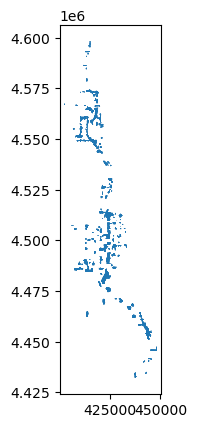

In [2702]:
gdf_se_calcs2 = gpd.read_file("intermediate/se_calcs2.geojson")
display(gdf_se_calcs2)
gdf_se_calcs2.plot()

In [2703]:
gdf_se_calcs2['f_ch']

0         225.794240
1         453.069472
2         640.357934
3          75.535062
4         492.796981
            ...     
11056    1022.153241
11057    1049.306804
11058       0.000000
11059       0.000000
11060       0.000000
Name: f_ch, Length: 11061, dtype: float64

In [2704]:
lst_project_taz = gdf_se_calcs2['TAZID'].drop_duplicates().tolist()
display(lst_project_taz)

[2496,
 2503,
 2504,
 2505,
 2498,
 2511,
 2513,
 2514,
 2535,
 2510,
 2512,
 2936,
 2933,
 2928,
 2929,
 2934,
 2930,
 2931,
 3069,
 3068,
 3066,
 3067,
 3039,
 3052,
 3058,
 3059,
 3079,
 3080,
 3082,
 3064,
 3065,
 3040,
 3081,
 2365,
 2361,
 2353,
 2363,
 2354,
 2367,
 2358,
 2333,
 2356,
 2868,
 2894,
 2935,
 2932,
 2887,
 2927,
 2888,
 2575,
 2704,
 2703,
 2702,
 2729,
 2728,
 2726,
 2700,
 2577,
 2701,
 2727,
 3144,
 3145,
 3147,
 3151,
 3150,
 3152,
 3149,
 3148,
 3154,
 2817,
 2824,
 2837,
 2813,
 2838,
 2820,
 2843,
 2834,
 2839,
 2841,
 2863,
 2864,
 2872,
 2840,
 2873,
 3335,
 3345,
 3347,
 3351,
 3364,
 3346,
 3365,
 3352,
 3353,
 3337,
 3336,
 2756,
 2755,
 2736,
 2733,
 2731,
 2764,
 2758,
 2757,
 2770,
 2771,
 2715,
 2772,
 2774,
 2791,
 2792,
 2811,
 2807,
 2809,
 2835,
 2810,
 2793,
 2808,
 702,
 703,
 723,
 739,
 724,
 730,
 712,
 713,
 690,
 691,
 696,
 697,
 1981,
 1999,
 2000,
 2013,
 2014,
 2015,
 2063,
 2064,
 1950,
 1951,
 1959,
 1960,
 1971,
 1984,
 1985,
 198

# Proportionally remove added growth from other TAZs in county to maintain totals

In [2705]:
gdf_se_calcs2_grouped = gdf_se_calcs2[['TAZID','parameter','se_year_F','center_type','s_ch','f_ch']].groupby(['TAZID','se_year_F','parameter','center_type'], as_index=False).sum()
gdf_se_calcs2_grouped

,TAZID,se_year_F,parameter,center_type,s_ch,f_ch
0,19,2032,TOTEMP,Neighborhood Center,0.0,0.0
1,19,2032,TOTHH,Neighborhood Center,0.0,0.0
2,19,2032,TOTHHEMP,Neighborhood Center,0.0,0.0
3,19,2042,TOTEMP,Neighborhood Center,0.0,0.0
4,19,2042,TOTHH,Neighborhood Center,0.0,0.0
...,...,...,...,...,...,...
10714,3407,2042,TOTHH,Neighborhood Center,0.0,0.0
10715,3407,2042,TOTHHEMP,Neighborhood Center,0.0,0.0
10716,3407,2050,TOTEMP,Neighborhood Center,0.0,0.0
10717,3407,2050,TOTHH,Neighborhood Center,0.0,0.0


In [2706]:
# get employment categories splits for region

df_emp_cat = pd.DataFrame([
    ['RETEMP','RETL'],
    ['RETEMP','FOOD'],
    ['OTHEMP','OFFI'],
    ['OTHEMP','GVED'],
    ['OTHEMP','HLTH'],
    ['OTHEMP','OTHR'],
    ['INDEMP','MANU'],
    ['INDEMP','WSLE'],
], columns=['EMP3CAT','parameter'])
display(df_emp_cat)

df_se_data_emp3cat = pd.merge(df_se_data_remove_emp_subtotals, df_emp_cat, on='parameter')
display(df_se_data_emp3cat)

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


,TAZID,CO_FIPS,parameter,value_F,se_year_F,EMP3CAT
0,1,3,RETL,0.0,2032,RETEMP
1,2,3,RETL,0.0,2032,RETEMP
2,3,3,RETL,0.0,2032,RETEMP
3,4,3,RETL,0.0,2032,RETEMP
4,5,3,RETL,0.4,2032,RETEMP
...,...,...,...,...,...,...
85099,3542,49,OTHR,0.0,2050,OTHEMP
85100,3543,49,OTHR,0.0,2050,OTHEMP
85101,3544,49,OTHR,0.0,2050,OTHEMP
85102,3545,49,OTHR,0.0,2050,OTHEMP


In [2707]:
df_se_data_emp8cat_total = df_se_data_emp3cat.drop(columns=['TAZID']).groupby(['se_year_F','parameter','EMP3CAT'], as_index=False).sum().rename(columns={'value_F':'emp8'})
display(df_se_data_emp8cat_total)

df_se_data_emp3cat_total = df_se_data_emp3cat.drop(columns=['TAZID','parameter']).groupby(['se_year_F','EMP3CAT'], as_index=False).sum().rename(columns={'value_F':'emp3'})
display(df_se_data_emp3cat_total)

,se_year_F,parameter,EMP3CAT,CO_FIPS,emp8
0,2032,FOOD,RETEMP,139474,118688.0
1,2032,GVED,OTHEMP,139474,307878.0
2,2032,HLTH,OTHEMP,139474,187136.4
3,2032,MANU,INDEMP,139474,134557.8
4,2032,OFFI,OTHEMP,139474,280360.2
5,2032,OTHR,OTHEMP,139474,513268.4
6,2032,RETL,RETEMP,139474,165564.2
7,2032,WSLE,INDEMP,139474,148219.6
8,2042,FOOD,RETEMP,139474,123917.8
9,2042,GVED,OTHEMP,139474,335173.4


,se_year_F,EMP3CAT,CO_FIPS,emp3
0,2032,INDEMP,278948,282777.4
1,2032,OTHEMP,557896,1288643.0
2,2032,RETEMP,278948,284252.2
3,2042,INDEMP,278948,280861.7
4,2042,OTHEMP,557896,1451190.4
5,2042,RETEMP,278948,323000.3
6,2050,INDEMP,278948,279101.1
7,2050,OTHEMP,557896,1574410.9
8,2050,RETEMP,278948,364257.1


In [2708]:
df_se_data_emp_portions = pd.merge(df_se_data_emp3cat_total, df_se_data_emp8cat_total, on=('se_year_F','EMP3CAT'))
df_se_data_emp_portions['emp8portion3'] = df_se_data_emp_portions['emp8'] / df_se_data_emp_portions['emp3']
df_se_data_emp_portions.rename(columns={'parameter':'EMP8CAT'}, inplace=True)
df_se_data_emp_portions.drop(columns=['emp3','emp8'], inplace=True)
df_se_data_emp_portions

,se_year_F,EMP3CAT,CO_FIPS_x,EMP8CAT,CO_FIPS_y,emp8portion3
0,2032,INDEMP,278948,MANU,139474,0.475844
1,2032,INDEMP,278948,WSLE,139474,0.524156
2,2032,OTHEMP,557896,GVED,139474,0.238916
3,2032,OTHEMP,557896,HLTH,139474,0.145220
4,2032,OTHEMP,557896,OFFI,139474,0.217562
5,2032,OTHEMP,557896,OTHR,139474,0.398301
6,2032,RETEMP,278948,FOOD,139474,0.417545
7,2032,RETEMP,278948,RETL,139474,0.582455
8,2042,INDEMP,278948,MANU,139474,0.501018
9,2042,INDEMP,278948,WSLE,139474,0.498982


In [2709]:
df_centers[['office', 'retail','industrial']] = df_centers['office_retail_ind_split'].str.split("/", expand=True)

# Convert the new columns to numeric types
df_centers['OTHEMP'] = pd.to_numeric(df_centers['office'])
df_centers['RETEMP'] = pd.to_numeric(df_centers['retail'])
df_centers['INDEMP'] = pd.to_numeric(df_centers['industrial'])

# Divide the columns by 100
df_centers['OTHEMP'] = df_centers['OTHEMP'] / 100
df_centers['RETEMP'] = df_centers['RETEMP'] / 100
df_centers['INDEMP'] = df_centers['INDEMP'] / 100


df_centers_office_retail = pd.melt(df_centers, id_vars=['center_type'], value_vars=['OTHEMP', 'RETEMP', 'INDEMP'], 
                                   var_name='EMP3CAT', value_name='split')

df_centers_office_retail

,center_type,EMP3CAT,split
0,Neighborhood Center,OTHEMP,0.35
1,City Center,OTHEMP,0.65
2,Urban Center,OTHEMP,0.75
3,Metropolitan Center,OTHEMP,0.80
4,Neighborhood Center,RETEMP,0.65
5,City Center,RETEMP,0.35
6,Urban Center,RETEMP,0.15
7,Metropolitan Center,RETEMP,0.10
8,Neighborhood Center,INDEMP,0.00
9,City Center,INDEMP,0.00


# Add Employment

In [2710]:
df_emp_add = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTEMP')].copy()
df_emp_add.drop(columns=['f_ch'], inplace = True)
df_emp_add = df_emp_add[df_emp_add['parameter']=='TOTEMP'].copy()
df_emp_add.drop(columns=['parameter'], inplace=True)
df_emp_add

,TAZID,se_year_F,center_type,s_ch
0,19,2032,Neighborhood Center,0.0
3,19,2042,Neighborhood Center,0.0
6,19,2050,Neighborhood Center,0.0
9,20,2032,Neighborhood Center,0.0
12,20,2042,Neighborhood Center,0.0
...,...,...,...,...
10704,3406,2042,Neighborhood Center,0.0
10707,3406,2050,Neighborhood Center,0.0
10710,3407,2032,Neighborhood Center,0.0
10713,3407,2042,Neighborhood Center,0.0


In [2711]:
df_emp_add.groupby(['se_year_F']).sum()

,TAZID,s_ch
se_year_F,,
2032,1814855,743868.473613
2042,1814855,743868.473613
2050,1814855,743868.473613


In [2712]:
df_emp_add_3split = pd.merge(df_emp_add, df_centers_office_retail, on='center_type')
df_emp_add_3split['s_ch_emp3'] = df_emp_add_3split['s_ch'] * df_emp_add_3split['split']
df_emp_add_3split

,TAZID,se_year_F,center_type,s_ch,EMP3CAT,split,s_ch_emp3
0,19,2032,Neighborhood Center,0.0,OTHEMP,0.35,0.0
1,19,2032,Neighborhood Center,0.0,RETEMP,0.65,0.0
2,19,2032,Neighborhood Center,0.0,INDEMP,0.00,0.0
3,19,2042,Neighborhood Center,0.0,OTHEMP,0.35,0.0
4,19,2042,Neighborhood Center,0.0,RETEMP,0.65,0.0
...,...,...,...,...,...,...,...
10714,3030,2042,Urban Center,0.0,RETEMP,0.15,0.0
10715,3030,2042,Urban Center,0.0,INDEMP,0.10,0.0
10716,3030,2050,Urban Center,0.0,OTHEMP,0.75,0.0
10717,3030,2050,Urban Center,0.0,RETEMP,0.15,0.0


In [2713]:
df_emp_add_3split.groupby(['se_year_F']).sum()

,TAZID,s_ch,split,s_ch_emp3
se_year_F,,,,
2032,5444565,2.231605e+06,1191.0,743868.473613
2042,5444565,2.231605e+06,1191.0,743868.473613
2050,5444565,2.231605e+06,1191.0,743868.473613


In [2714]:
df_emp_add_3split_8split = pd.merge(df_emp_add_3split, df_se_data_emp_portions, on=('se_year_F','EMP3CAT'))
df_emp_add_3split_8split['s_ch_cat8emp'] = df_emp_add_3split_8split['s_ch_emp3'] * df_emp_add_3split_8split['emp8portion3']
df_emp_add_3split_8split

,TAZID,se_year_F,center_type,s_ch,EMP3CAT,split,s_ch_emp3,CO_FIPS_x,EMP8CAT,CO_FIPS_y,emp8portion3,s_ch_cat8emp
0,19,2032,Neighborhood Center,0.000000,OTHEMP,0.35,0.000000,557896,GVED,139474,0.238916,0.000000
1,19,2032,Neighborhood Center,0.000000,OTHEMP,0.35,0.000000,557896,HLTH,139474,0.145220,0.000000
2,19,2032,Neighborhood Center,0.000000,OTHEMP,0.35,0.000000,557896,OFFI,139474,0.217562,0.000000
3,19,2032,Neighborhood Center,0.000000,OTHEMP,0.35,0.000000,557896,OTHR,139474,0.398301,0.000000
4,20,2032,Neighborhood Center,0.000000,OTHEMP,0.35,0.000000,557896,GVED,139474,0.238916,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
28579,3027,2050,Urban Center,158.239153,INDEMP,0.10,15.823915,278948,WSLE,139474,0.494801,7.829683
28580,3028,2050,Urban Center,1.670577,INDEMP,0.10,0.167058,278948,MANU,139474,0.505199,0.084397
28581,3028,2050,Urban Center,1.670577,INDEMP,0.10,0.167058,278948,WSLE,139474,0.494801,0.082660
28582,3030,2050,Urban Center,0.000000,INDEMP,0.10,0.000000,278948,MANU,139474,0.505199,0.000000


In [2715]:
df_emp_add_3split_8split.groupby(['se_year_F']).sum()

,TAZID,s_ch,split,s_ch_emp3,CO_FIPS_x,CO_FIPS_y,emp8portion3,s_ch_cat8emp
se_year_F,,,,,,,,
2032,14518840,5.950948e+06,3843.7,2.549292e+06,3986724816,1328908272,3573.0,743868.473613
2042,14518840,5.950948e+06,3843.7,2.549292e+06,3986724816,1328908272,3573.0,743868.473613
2050,14518840,5.950948e+06,3843.7,2.549292e+06,3986724816,1328908272,3573.0,743868.473613


In [2716]:
df_emp_add_3split_8split_taz = df_emp_add_3split_8split[['TAZID','se_year_F','EMP3CAT','EMP8CAT','s_ch_cat8emp']].groupby(['TAZID','se_year_F','EMP3CAT','EMP8CAT'], as_index=False).sum()
df_emp_add_3split_8split_taz

,TAZID,se_year_F,EMP3CAT,EMP8CAT,s_ch_cat8emp
0,19,2032,INDEMP,MANU,0.0
1,19,2032,INDEMP,WSLE,0.0
2,19,2032,OTHEMP,GVED,0.0
3,19,2032,OTHEMP,HLTH,0.0
4,19,2032,OTHEMP,OFFI,0.0
...,...,...,...,...,...
27139,3407,2050,OTHEMP,HLTH,0.0
27140,3407,2050,OTHEMP,OFFI,0.0
27141,3407,2050,OTHEMP,OTHR,0.0
27142,3407,2050,RETEMP,FOOD,0.0


In [2717]:
df_emp_add_3split_8split_taz.groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp
se_year_F,,
2032,13732320,743868.473613
2042,13732320,743868.473613
2050,13732320,743868.473613


In [2718]:
# add subotals
df_emp_add_with_subtotals = pd.merge(df_emp_add_3split_8split_taz, df_emp_subcategories, left_on='EMP8CAT', right_on='EMPCAT')
df_emp_add_with_subtotals

,TAZID,se_year_F,EMP3CAT,EMP8CAT,s_ch_cat8emp,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,19,2032,INDEMP,MANU,0.0,INDEMP,MANU,1,0,0,0,0
1,19,2032,INDEMP,MANU,0.0,TOTEMP,MANU,0,1,0,0,0
2,19,2032,INDEMP,MANU,0.0,ALLEMP,MANU,0,0,1,0,0
3,19,2032,INDEMP,MANU,0.0,MANU,MANU,0,0,0,1,1
4,19,2042,INDEMP,MANU,0.0,INDEMP,MANU,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
108571,3407,2042,RETEMP,RETL,0.0,RETL,RETL,0,0,0,1,1
108572,3407,2050,RETEMP,RETL,0.0,RETEMP,RETL,1,0,0,0,0
108573,3407,2050,RETEMP,RETL,0.0,TOTEMP,RETL,0,1,0,0,0
108574,3407,2050,RETEMP,RETL,0.0,ALLEMP,RETL,0,0,1,0,0


In [2719]:
df_emp_add_final = df_emp_add_with_subtotals[['TAZID','se_year_F','EMPGROUP','s_ch_cat8emp']].groupby(['TAZID','se_year_F','EMPGROUP'], as_index=False).sum()
df_emp_add_final

,TAZID,se_year_F,EMPGROUP,s_ch_cat8emp
0,19,2032,ALLEMP,0.0
1,19,2032,FOOD,0.0
2,19,2032,GVED,0.0
3,19,2032,HLTH,0.0
4,19,2032,INDEMP,0.0
...,...,...,...,...
44104,3407,2050,OTHR,0.0
44105,3407,2050,RETEMP,0.0
44106,3407,2050,RETL,0.0
44107,3407,2050,TOTEMP,0.0


In [2720]:
df_emp_add_final[df_emp_add_final['EMPGROUP']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp
se_year_F,,
2032,1716540,743868.473613
2042,1716540,743868.473613
2050,1716540,743868.473613


# Remove employment

In [2721]:
df_emp_del = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTEMP')].copy()
df_emp_del.drop(columns=['s_ch'], inplace = True)
df_emp_del = df_emp_del[df_emp_del['parameter']=='TOTEMP'].copy()
df_emp_del.drop(columns=['parameter'], inplace=True)
df_emp_del

,TAZID,se_year_F,center_type,f_ch
0,19,2032,Neighborhood Center,0.0
3,19,2042,Neighborhood Center,0.0
6,19,2050,Neighborhood Center,0.0
9,20,2032,Neighborhood Center,0.0
12,20,2042,Neighborhood Center,0.0
...,...,...,...,...
10704,3406,2042,Neighborhood Center,0.0
10707,3406,2050,Neighborhood Center,0.0
10710,3407,2032,Neighborhood Center,0.0
10713,3407,2042,Neighborhood Center,0.0


In [2722]:
df_emp_del[df_emp_del['TAZID']==1384]

,TAZID,se_year_F,center_type,f_ch
5148,1384,2032,Urban Center,1599.980126
5151,1384,2042,Urban Center,1621.121188
5154,1384,2050,Urban Center,1611.163442


In [2723]:
df_emp_sub08 = df_emp_subcategories[df_emp_subcategories['SUB08']==1]
df_emp_sub08

,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
8,TOTEMP,RETL,0,1,0,0,0
9,TOTEMP,FOOD,0,1,0,0,0
10,TOTEMP,MANU,0,1,0,0,0
11,TOTEMP,WSLE,0,1,0,0,0
12,TOTEMP,OFFI,0,1,0,0,0
13,TOTEMP,GVED,0,1,0,0,0
14,TOTEMP,OTHR,0,1,0,0,0
15,TOTEMP,HLTH,0,1,0,0,0


In [2724]:
# add subotals
df_se_data_totemp = df_se_data[df_se_data['parameter']=='TOTEMP'].copy()
df_se_data_totemp.rename(columns={'value_F':'value_F_TOTEMP','parameter':'EMPGROUP'}, inplace=True)
df_se_data_totemp

,TAZID,CO_FIPS,EMPGROUP,value_F_TOTEMP,se_year_F
14184,1,3,TOTEMP,0.0,2032
14185,2,3,TOTEMP,0.0,2032
14186,3,3,TOTEMP,0.0,2032
14187,4,3,TOTEMP,0.0,2032
14188,5,3,TOTEMP,7.3,2032
...,...,...,...,...,...
195025,3542,49,TOTEMP,0.0,2050
195026,3543,49,TOTEMP,0.0,2050
195027,3544,49,TOTEMP,0.0,2050
195028,3545,49,TOTEMP,0.0,2050


In [2725]:
df_se_data_cat8emp = pd.merge(df_se_data, df_emp_sub08, left_on='parameter', right_on='EMPCAT')
df_se_data_cat8emp

,TAZID,CO_FIPS,parameter,value_F,se_year_F,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,1,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
1,2,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
2,3,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
3,4,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
4,5,3,RETL,0.4,2032,TOTEMP,RETL,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
85099,3542,49,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85100,3543,49,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85101,3544,49,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85102,3545,49,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0


In [2726]:
df_se_data_cat8empPortionTotEmp = pd.merge(df_se_data_cat8emp, df_se_data_totemp, on=['TAZID','se_year_F','EMPGROUP'])
df_se_data_cat8empPortionTotEmp['cat8empPortionTotEmp'] = df_se_data_cat8empPortionTotEmp['value_F'] / df_se_data_cat8empPortionTotEmp['value_F_TOTEMP']
df_se_data_cat8empPortionTotEmp['cat8empPortionTotEmp'].fillna(0, inplace=True)
df_se_data_cat8empPortionTotEmp = df_se_data_cat8empPortionTotEmp[['se_year_F','TAZID','parameter','cat8empPortionTotEmp']]
df_se_data_cat8empPortionTotEmp

,se_year_F,TAZID,parameter,cat8empPortionTotEmp
0,2032,1,RETL,0.0
1,2032,1,FOOD,0.0
2,2032,1,MANU,0.0
3,2032,1,WSLE,0.0
4,2032,1,OFFI,0.0
...,...,...,...,...
85099,2050,3546,WSLE,0.0
85100,2050,3546,OFFI,0.0
85101,2050,3546,GVED,0.0
85102,2050,3546,HLTH,0.0


In [2727]:
df_se_data_cat8empPortionTotEmp.groupby(['se_year_F'], as_index=False).sum()

,se_year_F,TAZID,cat8empPortionTotEmp
0,2032,50310648,2689.0
1,2042,50310648,2738.0
2,2050,50310648,2765.0


In [2728]:
df_emp_del_with_portion = pd.merge(df_emp_del, df_se_data_cat8empPortionTotEmp, on=['se_year_F','TAZID'])
df_emp_del_with_portion['f_ch_cat8emp'] = df_emp_del_with_portion['f_ch'] * df_emp_del_with_portion['cat8empPortionTotEmp']
df_emp_del_with_portion

,TAZID,se_year_F,center_type,f_ch,parameter,cat8empPortionTotEmp,f_ch_cat8emp
0,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0
1,19,2032,Neighborhood Center,0.0,FOOD,0.038724,0.0
2,19,2032,Neighborhood Center,0.0,MANU,0.164009,0.0
3,19,2032,Neighborhood Center,0.0,WSLE,0.205011,0.0
4,19,2032,Neighborhood Center,0.0,OFFI,0.027335,0.0
...,...,...,...,...,...,...,...
28579,3407,2050,Neighborhood Center,0.0,WSLE,0.030439,0.0
28580,3407,2050,Neighborhood Center,0.0,OFFI,0.022381,0.0
28581,3407,2050,Neighborhood Center,0.0,GVED,0.050134,0.0
28582,3407,2050,Neighborhood Center,0.0,HLTH,0.083259,0.0


In [2729]:
df_emp_del_with_portion.groupby('se_year_F').sum()

,TAZID,f_ch,cat8empPortionTotEmp,f_ch_cat8emp
se_year_F,,,,
2032,14518840,4.411839e+06,1140.0,551479.855026
2042,14518840,4.749471e+06,1145.0,593683.909873
2050,14518840,5.041168e+06,1145.0,630146.048136


In [2730]:
df_emp_subcategories

,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,RETEMP,RETL,1,0,0,0,0
1,RETEMP,FOOD,1,0,0,0,0
2,INDEMP,MANU,1,0,0,0,0
3,INDEMP,WSLE,1,0,0,0,0
4,OTHEMP,OFFI,1,0,0,0,0
5,OTHEMP,GVED,1,0,0,0,0
6,OTHEMP,OTHR,1,0,0,0,0
7,OTHEMP,HLTH,1,0,0,0,0
8,TOTEMP,RETL,0,1,0,0,0
9,TOTEMP,FOOD,0,1,0,0,0


In [2731]:
df_emp_del_with_subtotals = pd.merge(df_emp_del_with_portion, df_emp_subcategories[['EMPGROUP','EMPCAT']], left_on='parameter', right_on='EMPCAT')
df_emp_del_with_subtotals

,TAZID,se_year_F,center_type,f_ch,parameter,cat8empPortionTotEmp,f_ch_cat8emp,EMPGROUP,EMPCAT
0,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0,RETEMP,RETL
1,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0,TOTEMP,RETL
2,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0,ALLEMP,RETL
3,19,2032,Neighborhood Center,0.0,RETL,0.291572,0.0,RETL,RETL
4,19,2042,Neighborhood Center,0.0,RETL,0.316430,0.0,RETEMP,RETL
...,...,...,...,...,...,...,...,...,...
114331,3407,2042,Neighborhood Center,0.0,OTHR,0.490600,0.0,OTHR,OTHR
114332,3407,2050,Neighborhood Center,0.0,OTHR,0.490600,0.0,OTHEMP,OTHR
114333,3407,2050,Neighborhood Center,0.0,OTHR,0.490600,0.0,TOTEMP,OTHR
114334,3407,2050,Neighborhood Center,0.0,OTHR,0.490600,0.0,ALLEMP,OTHR


In [2732]:
df_emp_del_final = df_emp_del_with_subtotals[['TAZID','se_year_F','EMPGROUP','f_ch_cat8emp']].groupby(['TAZID','se_year_F','EMPGROUP'], as_index=False).sum()
df_emp_del_final

,TAZID,se_year_F,EMPGROUP,f_ch_cat8emp
0,19,2032,ALLEMP,0.0
1,19,2032,FOOD,0.0
2,19,2032,GVED,0.0
3,19,2032,HLTH,0.0
4,19,2032,INDEMP,0.0
...,...,...,...,...
44104,3407,2050,OTHR,0.0
44105,3407,2050,RETEMP,0.0
44106,3407,2050,RETL,0.0
44107,3407,2050,TOTEMP,0.0


In [2733]:
df_emp_del_final[df_emp_del_final['EMPGROUP']=='TOTEMP'].groupby(['se_year_F'], as_index=False).sum()

,se_year_F,TAZID,f_ch_cat8emp
0,2032,1716540,551479.855026
1,2042,1716540,593683.909873
2,2050,1716540,630146.048136


In [2734]:
df_se_data[(df_se_data['TAZID']==1384) & (df_se_data['se_year_F']==2050)]

,TAZID,CO_FIPS,parameter,value_F,se_year_F
178683,1384,35,CO_TAZID,350479.000000,2050
182229,1384,35,TOTHH,338.500000,2050
185775,1384,35,HHPOP,806.391083,2050
189321,1384,35,HHSIZE,2.382248,2050
192867,1384,35,TOTEMP,1752.833333,2050
196413,1384,35,RETEMP,1248.500000,2050
199959,1384,35,INDEMP,65.500000,2050
203505,1384,35,OTHEMP,438.833333,2050
207051,1384,35,ALLEMP,1893.434086,2050
210597,1384,35,RETL,718.166667,2050


In [2735]:
df_emp_del_final[df_emp_del_final['TAZID']==1384]

,TAZID,se_year_F,EMPGROUP,f_ch_cat8emp
21294,1384,2032,ALLEMP,1599.980126
21295,1384,2032,FOOD,503.096010
21296,1384,2032,GVED,10.264139
21297,1384,2032,HLTH,1.685157
21298,1384,2032,INDEMP,89.006937
21299,1384,2032,MANU,1.378765
21300,1384,2032,OFFI,172.192423
21301,1384,2032,OTHEMP,386.360578
21302,1384,2032,OTHR,202.218859
21303,1384,2032,RETEMP,1124.612611


# Finish up employment

In [2736]:
df_emp_changes = pd.merge(df_emp_add_final, df_emp_del_final, on=['TAZID','se_year_F','EMPGROUP'], how='outer')
df_emp_changes[['s_ch_cat8emp','f_ch_cat8emp']] = df_emp_changes[['s_ch_cat8emp','f_ch_cat8emp']].fillna(0)
df_emp_changes

,TAZID,se_year_F,EMPGROUP,s_ch_cat8emp,f_ch_cat8emp
0,19,2032,ALLEMP,0.0,0.0
1,19,2032,FOOD,0.0,0.0
2,19,2032,GVED,0.0,0.0
3,19,2032,HLTH,0.0,0.0
4,19,2032,INDEMP,0.0,0.0
...,...,...,...,...,...
44104,3407,2050,OTHR,0.0,0.0
44105,3407,2050,RETEMP,0.0,0.0
44106,3407,2050,RETL,0.0,0.0
44107,3407,2050,TOTEMP,0.0,0.0


In [2737]:
df_emp_changes[df_emp_changes['EMPGROUP']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp,f_ch_cat8emp
se_year_F,,,
2032,1716540,743868.473613,551479.855026
2042,1716540,743868.473613,593683.909873
2050,1716540,743868.473613,630146.048136


In [2738]:
df_emp_changes['final_ch'] = -1 * df_emp_changes['f_ch_cat8emp'] + df_emp_changes['s_ch_cat8emp']
df_emp_changes.rename(columns={'EMPGROUP':'parameter'}, inplace=True)
df_emp_changes

,TAZID,se_year_F,parameter,s_ch_cat8emp,f_ch_cat8emp,final_ch
0,19,2032,ALLEMP,0.0,0.0,0.0
1,19,2032,FOOD,0.0,0.0,0.0
2,19,2032,GVED,0.0,0.0,0.0
3,19,2032,HLTH,0.0,0.0,0.0
4,19,2032,INDEMP,0.0,0.0,0.0
...,...,...,...,...,...,...
44104,3407,2050,OTHR,0.0,0.0,0.0
44105,3407,2050,RETEMP,0.0,0.0,0.0
44106,3407,2050,RETL,0.0,0.0,0.0
44107,3407,2050,TOTEMP,0.0,0.0,0.0


In [2739]:
df_emp_changes[df_emp_changes['parameter']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp,f_ch_cat8emp,final_ch
se_year_F,,,,
2032,1716540,743868.473613,551479.855026,192388.618587
2042,1716540,743868.473613,593683.909873,150184.563740
2050,1716540,743868.473613,630146.048136,113722.425477


In [2740]:
df_se_data

,TAZID,CO_FIPS,parameter,value_F,se_year_F
0,1,3,CO_TAZID,30001.0,2032
1,2,3,CO_TAZID,30002.0,2032
2,3,3,CO_TAZID,30003.0,2032
3,4,3,CO_TAZID,30004.0,2032
4,5,3,CO_TAZID,30005.0,2032
...,...,...,...,...,...
265945,3542,49,Enrol_High,0.0,2050
265946,3543,49,Enrol_High,0.0,2050
265947,3544,49,Enrol_High,0.0,2050
265948,3545,49,Enrol_High,0.0,2050


In [2741]:
df_se_data_with_emp_changes = pd.merge(df_se_data, df_emp_changes, on=['se_year_F','TAZID','parameter'])
df_se_data_with_emp_changes['value_S'] = round(df_se_data_with_emp_changes['value_F'] + df_se_data_with_emp_changes['final_ch'],4)
df_se_data_with_emp_changes

,TAZID,CO_FIPS,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S
0,19,3,TOTEMP,43.900000,2032,0.0,0.0,0.0,43.9000
1,20,3,TOTEMP,117.200000,2032,0.0,0.0,0.0,117.2000
2,25,3,TOTEMP,151.900000,2032,0.0,0.0,0.0,151.9000
3,26,3,TOTEMP,178.700000,2032,0.0,0.0,0.0,178.7000
4,30,3,TOTEMP,83.300000,2032,0.0,0.0,0.0,83.3000
...,...,...,...,...,...,...,...,...,...
44104,3388,49,OTHR,533.666667,2050,0.0,0.0,0.0,533.6667
44105,3394,49,OTHR,105.666667,2050,0.0,0.0,0.0,105.6667
44106,3405,49,OTHR,73.000000,2050,0.0,0.0,0.0,73.0000
44107,3406,49,OTHR,45.500000,2050,0.0,0.0,0.0,45.5000


In [2742]:
# check for negative SE
df_se_data_with_emp_changes[df_se_data_with_emp_changes['value_S']<0]

,TAZID,CO_FIPS,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S


In [2743]:
df_se_data_with_emp_changes[df_se_data_with_emp_changes['TAZID']==679]

,TAZID,CO_FIPS,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S
259,679,11,TOTEMP,455.833333,2032,422.640946,250.967303,171.673643,627.5070
1390,679,11,RETEMP,58.666667,2032,147.924331,32.299997,115.624334,174.2910
2521,679,11,INDEMP,4.000000,2032,0.000000,2.202272,-2.202272,1.7977
3652,679,11,OTHEMP,393.166667,2032,274.716615,216.465034,58.251581,451.4182
4783,679,11,ALLEMP,571.701517,2032,422.640946,250.967303,171.673643,743.3752
5914,679,11,RETL,33.833333,2032,86.159310,18.627555,67.531756,101.3651
7045,679,11,FOOD,24.833333,2032,61.765021,13.672442,48.092579,72.9259
8176,679,11,MANU,1.666667,2032,0.000000,0.917614,-0.917614,0.7491
9307,679,11,WSLE,2.333333,2032,0.000000,1.284659,-1.284659,1.0487
10438,679,11,OFFI,64.666667,2032,59.767992,35.603405,24.164587,88.8313


In [2744]:
df_se_data_with_emp_changes_final = df_se_data_with_emp_changes[['se_year_F','TAZID','parameter','s_ch_cat8emp','f_ch_cat8emp','final_ch','value_S']].rename(columns={'s_ch_cat8emp':'s_ch', 'f_ch_cat8emp':'f_ch'})
df_se_data_with_emp_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,19,TOTEMP,0.0,0.0,0.0,43.9000
1,2032,20,TOTEMP,0.0,0.0,0.0,117.2000
2,2032,25,TOTEMP,0.0,0.0,0.0,151.9000
3,2032,26,TOTEMP,0.0,0.0,0.0,178.7000
4,2032,30,TOTEMP,0.0,0.0,0.0,83.3000
...,...,...,...,...,...,...,...
44104,2050,3388,OTHR,0.0,0.0,0.0,533.6667
44105,2050,3394,OTHR,0.0,0.0,0.0,105.6667
44106,2050,3405,OTHR,0.0,0.0,0.0,73.0000
44107,2050,3406,OTHR,0.0,0.0,0.0,45.5000


In [2745]:
df_se_data_with_emp_changes_final = pd.merge(df_se_data_with_emp_changes_final, df_emp_cat[['parameter']], on='parameter')
df_se_data_with_emp_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,19,RETL,0.0,0.0,0.0,12.8000
1,2032,20,RETL,0.0,0.0,0.0,13.7000
2,2032,25,RETL,0.0,0.0,0.0,5.0000
3,2032,26,RETL,0.0,0.0,0.0,10.9000
4,2032,30,RETL,0.0,0.0,0.0,7.9000
...,...,...,...,...,...,...,...
27139,2050,3388,OTHR,0.0,0.0,0.0,533.6667
27140,2050,3394,OTHR,0.0,0.0,0.0,105.6667
27141,2050,3405,OTHR,0.0,0.0,0.0,73.0000
27142,2050,3406,OTHR,0.0,0.0,0.0,45.5000


In [2746]:
df_se_data_with_emp_changes_final[df_se_data_with_emp_changes_final['TAZID']==1520]

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
606,2032,1520,RETL,1.742457,0.049970,1.692487,10.3592
1737,2042,1520,RETL,1.843867,0.055736,1.788131,11.4548
2868,2050,1520,RETL,1.856962,0.057658,1.799303,11.7993
3999,2032,1520,FOOD,1.249115,0.070151,1.178964,13.3456
5130,2042,1520,FOOD,1.147705,0.068229,1.079476,12.9128
6261,2050,1520,FOOD,1.134610,0.068229,1.066381,12.8997
7392,2032,1520,MANU,0.000000,0.000000,0.000000,0.0000
8523,2042,1520,MANU,0.000000,0.000000,0.000000,0.0000
9654,2050,1520,MANU,0.000000,0.000000,0.000000,0.0000
10785,2032,1520,WSLE,0.000000,0.002883,-0.002883,0.4971


# Households/Population Added

In [2747]:
df_centers_hhsize = df_centers[['center_type','household_size']]
df_centers_hhsize

,center_type,household_size
0,Neighborhood Center,1.62
1,City Center,1.62
2,Urban Center,1.62
3,Metropolitan Center,1.62


In [2748]:
df_se_calcs2_hh = gdf_se_calcs2_grouped[gdf_se_calcs2_grouped['parameter']=='TOTHH'].copy()
df_se_calcs2_hh_add = df_se_calcs2_hh.drop(columns=['f_ch']) # scenario households are s_ch, forecast households are f_ch
df_se_calcs2_hh_add

,TAZID,se_year_F,parameter,center_type,s_ch
1,19,2032,TOTHH,Neighborhood Center,0.0
4,19,2042,TOTHH,Neighborhood Center,0.0
7,19,2050,TOTHH,Neighborhood Center,0.0
10,20,2032,TOTHH,Neighborhood Center,0.0
13,20,2042,TOTHH,Neighborhood Center,0.0
...,...,...,...,...,...
10705,3406,2042,TOTHH,Neighborhood Center,0.0
10708,3406,2050,TOTHH,Neighborhood Center,0.0
10711,3407,2032,TOTHH,Neighborhood Center,0.0
10714,3407,2042,TOTHH,Neighborhood Center,0.0


In [2749]:
df_se_calcs2_pop_add = df_se_calcs2_hh.copy()
df_se_calcs2_pop_add = pd.merge(df_se_calcs2_pop_add, df_centers_hhsize, on='center_type')
df_se_calcs2_pop_add['parameter'] = 'HHPOP'
df_se_calcs2_pop_add['s_ch'] = df_se_calcs2_pop_add['s_ch'] * df_se_calcs2_pop_add['household_size']
df_se_calcs2_pop_add = df_se_calcs2_pop_add[['TAZID','se_year_F','parameter','center_type','s_ch']]
df_se_calcs2_pop_add

,TAZID,se_year_F,parameter,center_type,s_ch
0,19,2032,HHPOP,Neighborhood Center,0.0
1,19,2042,HHPOP,Neighborhood Center,0.0
2,19,2050,HHPOP,Neighborhood Center,0.0
3,20,2032,HHPOP,Neighborhood Center,0.0
4,20,2042,HHPOP,Neighborhood Center,0.0
...,...,...,...,...,...
3568,3028,2042,HHPOP,Urban Center,0.841971
3569,3028,2050,HHPOP,Urban Center,0.841971
3570,3030,2032,HHPOP,Urban Center,0.0
3571,3030,2042,HHPOP,Urban Center,0.0


In [2750]:
df_se_calcs2_hh_pop_add = pd.concat([df_se_calcs2_hh_add, df_se_calcs2_pop_add])
df_se_calcs2_hh_pop_add = df_se_calcs2_hh_pop_add.groupby(['TAZID','se_year_F','parameter'], as_index=False).agg(s_ch=('s_ch','sum'))
df_se_calcs2_hh_pop_add

,TAZID,se_year_F,parameter,s_ch
0,19,2032,HHPOP,0.0
1,19,2032,TOTHH,0.0
2,19,2042,HHPOP,0.0
3,19,2042,TOTHH,0.0
4,19,2050,HHPOP,0.0
...,...,...,...,...
6781,3407,2032,TOTHH,0.0
6782,3407,2042,HHPOP,0.0
6783,3407,2042,TOTHH,0.0
6784,3407,2050,HHPOP,0.0


In [2751]:
df_se_calcs2_hh_pop_add

,TAZID,se_year_F,parameter,s_ch
0,19,2032,HHPOP,0.0
1,19,2032,TOTHH,0.0
2,19,2042,HHPOP,0.0
3,19,2042,TOTHH,0.0
4,19,2050,HHPOP,0.0
...,...,...,...,...
6781,3407,2032,TOTHH,0.0
6782,3407,2042,HHPOP,0.0
6783,3407,2042,TOTHH,0.0
6784,3407,2050,HHPOP,0.0


In [2752]:
df_se_calcs2_hh_pop_add.groupby(['se_year_F','parameter']).agg(s_ch=('s_ch','sum'))

s_ch
se_year_F parameter               
2032      HHPOP      504702.444767
          TOTHH      311544.718992
2042      HHPOP      504702.444767
          TOTHH      311544.718992
2050      HHPOP      504702.444767
          TOTHH      311544.718992

# Households/Pop Remove

In [2753]:
df_se_calcs2_hh.groupby(['se_year_F','parameter']).sum()

,,TAZID,s_ch,f_ch
se_year_F,parameter,,,
2032,TOTHH,1814855,311544.718992,122703.709018
2042,TOTHH,1814855,311544.718992,157932.806508
2050,TOTHH,1814855,311544.718992,178154.132473


In [2754]:
# gdf_se_calcs2_grouped are only project polygons
df_se_calcs2_hh = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTHH')].copy()
df_se_calcs2_hh_del = df_se_calcs2_hh.groupby(['TAZID','se_year_F','parameter'], as_index=False).agg(f_ch=('f_ch','sum'))
df_se_calcs2_hh_del

,TAZID,se_year_F,parameter,f_ch
0,19,2032,TOTHH,0.0
1,19,2042,TOTHH,0.0
2,19,2050,TOTHH,0.0
3,20,2032,TOTHH,0.0
4,20,2042,TOTHH,0.0
...,...,...,...,...
3388,3406,2042,TOTHH,0.0
3389,3406,2050,TOTHH,0.0
3390,3407,2032,TOTHH,0.0
3391,3407,2042,TOTHH,0.0


In [2755]:
df_se_data_hhsize = df_se_data[df_se_data['parameter']=='HHSIZE'].rename(columns={'value_F':'hhsize'}).drop(columns=['parameter'])
df_se_data_hhsize

,TAZID,CO_FIPS,hhsize,se_year_F
10638,1,3,0.000000,2032
10639,2,3,5.344828,2032
10640,3,3,4.059603,2032
10641,4,3,3.200000,2032
10642,5,3,2.867572,2032
...,...,...,...,...
191479,3542,49,1.500000,2050
191480,3543,49,0.000000,2050
191481,3544,49,0.000000,2050
191482,3545,49,5.000000,2050


In [2756]:
df_se_calcs2_pop_del = pd.merge(df_se_calcs2_hh_del.rename(columns={'f_ch':'hh'}).drop(columns=['parameter']), df_se_data_hhsize, on=['TAZID','se_year_F'])
df_se_calcs2_pop_del['parameter'] = 'HHPOP'
df_se_calcs2_pop_del['f_ch'] = df_se_calcs2_pop_del['hh'] * df_se_calcs2_pop_del['hhsize']
df_se_calcs2_pop_del.drop(columns=['hh','hhsize'], inplace=True)
df_se_calcs2_pop_del

,TAZID,se_year_F,CO_FIPS,parameter,f_ch
0,19,2032,3,HHPOP,0.0
1,19,2042,3,HHPOP,0.0
2,19,2050,3,HHPOP,0.0
3,20,2032,3,HHPOP,0.0
4,20,2042,3,HHPOP,0.0
...,...,...,...,...,...
3388,3406,2042,49,HHPOP,0.0
3389,3406,2050,49,HHPOP,0.0
3390,3407,2032,49,HHPOP,0.0
3391,3407,2042,49,HHPOP,0.0


In [2757]:
df_se_calcs2_hh_pop_del = pd.concat([df_se_calcs2_hh_del, df_se_calcs2_pop_del])
df_se_calcs2_hh_pop_del

,TAZID,se_year_F,parameter,f_ch,CO_FIPS
0,19,2032,TOTHH,0.0,NaN
1,19,2042,TOTHH,0.0,NaN
2,19,2050,TOTHH,0.0,NaN
3,20,2032,TOTHH,0.0,NaN
4,20,2042,TOTHH,0.0,NaN
...,...,...,...,...,...
3388,3406,2042,HHPOP,0.0,49.0
3389,3406,2050,HHPOP,0.0,49.0
3390,3407,2032,HHPOP,0.0,49.0
3391,3407,2042,HHPOP,0.0,49.0


# Finish Up Households/Population Changes

In [2758]:
#s_ch = scenario numbers on changeable land
#f_ch = forecast numbers on changeable land
#final_ch = scenario - forecast on changeable land (number in addition to forecast)--this is what is taken from other areas of county (redistributed)

df_hh_changes = pd.merge(df_se_calcs2_hh_pop_add, df_se_calcs2_hh_pop_del, on=['TAZID','se_year_F','parameter'], how='outer')
df_hh_changes = df_hh_changes.fillna(0)
df_hh_changes

,TAZID,se_year_F,parameter,s_ch,f_ch,CO_FIPS
0,19,2032,HHPOP,0.0,0.0,3.0
1,19,2032,TOTHH,0.0,0.0,0.0
2,19,2042,HHPOP,0.0,0.0,3.0
3,19,2042,TOTHH,0.0,0.0,0.0
4,19,2050,HHPOP,0.0,0.0,3.0
...,...,...,...,...,...,...
6781,3407,2032,TOTHH,0.0,0.0,0.0
6782,3407,2042,HHPOP,0.0,0.0,49.0
6783,3407,2042,TOTHH,0.0,0.0,0.0
6784,3407,2050,HHPOP,0.0,0.0,49.0


In [2759]:
df_hh_changes['final_ch'] = df_hh_changes['s_ch'] - df_hh_changes['f_ch']
df_hh_changes

,TAZID,se_year_F,parameter,s_ch,f_ch,CO_FIPS,final_ch
0,19,2032,HHPOP,0.0,0.0,3.0,0.0
1,19,2032,TOTHH,0.0,0.0,0.0,0.0
2,19,2042,HHPOP,0.0,0.0,3.0,0.0
3,19,2042,TOTHH,0.0,0.0,0.0,0.0
4,19,2050,HHPOP,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...
6781,3407,2032,TOTHH,0.0,0.0,0.0,0.0
6782,3407,2042,HHPOP,0.0,0.0,49.0,0.0
6783,3407,2042,TOTHH,0.0,0.0,0.0,0.0
6784,3407,2050,HHPOP,0.0,0.0,49.0,0.0


In [2760]:
df_hh_changes.groupby(['se_year_F','parameter']).sum()

TAZID           s_ch           f_ch  CO_FIPS  \
se_year_F parameter                                                   
2032      HHPOP      1716540  504702.444767  323311.801174  42861.0   
          TOTHH      1716540  311544.718992  122703.709018      0.0   
2042      HHPOP      1716540  504702.444767  396498.149729  42861.0   
          TOTHH      1716540  311544.718992  157932.806508      0.0   
2050      HHPOP      1716540  504702.444767  432009.399136  42861.0   
          TOTHH      1716540  311544.718992  178154.132473      0.0   

                          final_ch  
se_year_F parameter                 
2032      HHPOP      181390.643593  
          TOTHH      188841.009974  
2042      HHPOP      108204.295038  
          TOTHH      153611.912484  
2050      HHPOP       72693.045631  
          TOTHH      133390.586519

From webmap 2050 forecast = 662+2901+6301=9864

From webmap 2050 scenario = 18230+21290+24646=64166

final_ch = 64166-9864=54302

In [2761]:
# value_S is the TAZ value at the scenario level. So, it's the forecast + final_ch
# only for tazs within project area
df_se_data_with_hh_changes = pd.merge(df_se_data[(df_se_data['parameter'].isin(['TOTHH','HHPOP'])) & df_se_data['TAZID'].isin(lst_project_taz)], df_hh_changes, on=['se_year_F','TAZID','parameter'], how='left').fillna(0)
df_se_data_with_hh_changes['value_S'] = round(df_se_data_with_hh_changes['value_F'] + df_se_data_with_hh_changes['final_ch'],4)
df_se_data_with_hh_changes

,TAZID,CO_FIPS_x,parameter,value_F,se_year_F,s_ch,f_ch,CO_FIPS_y,final_ch,value_S
0,19,3,TOTHH,179.700000,2032,0.0,0.0,0.0,0.0,179.7000
1,20,3,TOTHH,164.200000,2032,0.0,0.0,0.0,0.0,164.2000
2,25,3,TOTHH,297.900000,2032,0.0,0.0,0.0,0.0,297.9000
3,26,3,TOTHH,183.000000,2032,0.0,0.0,0.0,0.0,183.0000
4,30,3,TOTHH,309.300000,2032,0.0,0.0,0.0,0.0,309.3000
...,...,...,...,...,...,...,...,...,...,...
6781,3388,49,HHPOP,879.499602,2050,0.0,0.0,49.0,0.0,879.4996
6782,3394,49,HHPOP,298.290363,2050,0.0,0.0,49.0,0.0,298.2904
6783,3405,49,HHPOP,376.078773,2050,0.0,0.0,49.0,0.0,376.0788
6784,3406,49,HHPOP,483.240760,2050,0.0,0.0,49.0,0.0,483.2408


In [2762]:
df_se_data_with_hh_changes.groupby(['se_year_F','parameter']).sum()

TAZID  CO_FIPS_x       value_F           s_ch  \
se_year_F parameter                                                    
2032      HHPOP      1716540      42861  1.183052e+06  504702.444767   
          TOTHH      1716540      42861  4.357038e+05  311544.718992   
2042      HHPOP      1716540      42861  1.366803e+06  504702.444767   
          TOTHH      1716540      42861  5.316209e+05  311544.718992   
2050      HHPOP      1716540      42861  1.469218e+06  504702.444767   
          TOTHH      1716540      42861  5.925223e+05  311544.718992   

                              f_ch  CO_FIPS_y       final_ch       value_S  
se_year_F parameter                                                         
2032      HHPOP      323311.801174    42861.0  181390.643593  1.364442e+06  
          TOTHH      122703.709018        0.0  188841.009974  6.245448e+05  
2042      HHPOP      396498.149729    42861.0  108204.295038  1.475008e+06  
          TOTHH      157932.806508        0.0  153611.912484  6.852328e+05  
2050      HHPOP      432009.399136    42861.0   72693.045631  1.541911e+06  
          TOTHH      178154.132473        0.0  133390.586519  7.259129e+05

In [2763]:
df_se_data_with_hh_changes[df_se_data_with_hh_changes['TAZID']==679]

,TAZID,CO_FIPS_x,parameter,value_F,se_year_F,s_ch,f_ch,CO_FIPS_y,final_ch,value_S
259,679,11,TOTHH,813.333333,2032,338.112757,103.724658,0.0,234.388099,1047.7214
1390,679,11,HHPOP,2607.997927,2032,547.742666,332.598803,11.0,215.143863,2823.1418
2521,679,11,TOTHH,956.833333,2042,338.112757,122.025259,0.0,216.087498,1172.9208
3652,679,11,HHPOP,2809.565797,2042,547.742666,358.304818,11.0,189.437848,2999.0036
4783,679,11,TOTHH,1038.500000,2050,338.112757,132.440235,0.0,205.672522,1244.1725
5914,679,11,HHPOP,2911.463897,2050,547.742666,371.299915,11.0,176.442751,3087.9066


In [2764]:
df_se_data_with_hh_changes_final = df_se_data_with_hh_changes[['se_year_F','TAZID','parameter','s_ch','f_ch','final_ch','value_S']]
df_se_data_with_hh_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,19,TOTHH,0.0,0.0,0.0,179.7000
1,2032,20,TOTHH,0.0,0.0,0.0,164.2000
2,2032,25,TOTHH,0.0,0.0,0.0,297.9000
3,2032,26,TOTHH,0.0,0.0,0.0,183.0000
4,2032,30,TOTHH,0.0,0.0,0.0,309.3000
...,...,...,...,...,...,...,...
6781,2050,3388,HHPOP,0.0,0.0,0.0,879.4996
6782,2050,3394,HHPOP,0.0,0.0,0.0,298.2904
6783,2050,3405,HHPOP,0.0,0.0,0.0,376.0788
6784,2050,3406,HHPOP,0.0,0.0,0.0,483.2408


In [2765]:
df_se_data_with_hh_changes_final.groupby(['se_year_F','parameter']).sum()

TAZID           s_ch           f_ch       final_ch  \
se_year_F parameter                                                         
2032      HHPOP      1716540  504702.444767  323311.801174  181390.643593   
          TOTHH      1716540  311544.718992  122703.709018  188841.009974   
2042      HHPOP      1716540  504702.444767  396498.149729  108204.295038   
          TOTHH      1716540  311544.718992  157932.806508  153611.912484   
2050      HHPOP      1716540  504702.444767  432009.399136   72693.045631   
          TOTHH      1716540  311544.718992  178154.132473  133390.586519   

                          value_S  
se_year_F parameter                
2032      HHPOP      1.364442e+06  
          TOTHH      6.245448e+05  
2042      HHPOP      1.475008e+06  
          TOTHH      6.852328e+05  
2050      HHPOP      1.541911e+06  
          TOTHH      7.259129e+05

# Combine

In [2766]:
df_se_data_project_taz = pd.concat([df_se_data_with_hh_changes_final, df_se_data_with_emp_changes_final])
df_se_data_project_taz

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,19,TOTHH,0.0,0.0,0.0,179.7000
1,2032,20,TOTHH,0.0,0.0,0.0,164.2000
2,2032,25,TOTHH,0.0,0.0,0.0,297.9000
3,2032,26,TOTHH,0.0,0.0,0.0,183.0000
4,2032,30,TOTHH,0.0,0.0,0.0,309.3000
...,...,...,...,...,...,...,...
27139,2050,3388,OTHR,0.0,0.0,0.0,533.6667
27140,2050,3394,OTHR,0.0,0.0,0.0,105.6667
27141,2050,3405,OTHR,0.0,0.0,0.0,73.0000
27142,2050,3406,OTHR,0.0,0.0,0.0,45.5000


# Redistribute

In [2767]:
gdf_taz = gpd.read_file('input/taz-shapefile/' + _config.taz_shapefile)
df_taz = gdf_taz.drop(columns=['geometry'])
df_taz = df_taz[['TAZID','CO_FIPS']]
df_taz

,TAZID,CO_FIPS
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
3541,3506,49
3542,3508,49
3543,3504,49
3544,3546,49


In [2768]:
df_emp_cat

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


In [2769]:
# Filter df_se_data based on the 'parameter' column
df_se_data_rdist = df_se_data[df_se_data['parameter'].isin(['TOTHH', 'HHPOP'] + df_emp_cat['parameter'].tolist())]

# only use TAZs that are in project area
df_se_data_rdist = df_se_data_rdist[(df_se_data_rdist['TAZID'].isin(df_se_data_project_taz['TAZID'].drop_duplicates().tolist()))]

#df_se_data_rdist_cofips = pd.merge(df_se_data_rdist, df_taz, on='TAZID')
df_se_data_rdist_cofips = df_se_data_rdist.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['value_F'].sum()

df_se_data_rdist_cofips

,se_year_F,CO_FIPS,parameter,value_F
0,2032,3,FOOD,703.000000
1,2032,3,GVED,1011.900000
2,2032,3,HHPOP,11947.000000
3,2032,3,HLTH,452.300000
4,2032,3,MANU,301.700000
...,...,...,...,...
145,2050,57,OFFI,11141.833333
146,2050,57,OTHR,36133.333333
147,2050,57,RETL,15760.166667
148,2050,57,TOTHH,67430.000000


In [2770]:
df_se_data_project_taz_rdist_cofips = pd.merge(df_se_data_project_taz, df_taz, on='TAZID')
df_se_data_project_taz_rdist_cofips = df_se_data_project_taz_rdist_cofips.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['s_ch','f_ch','final_ch','value_S'].sum()
df_se_data_project_taz_rdist_cofips

C:\Users\bhereth\AppData\Local\Temp\ipykernel_20976\29851068.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_se_data_project_taz_rdist_cofips = df_se_data_project_taz_rdist_cofips.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['s_ch','f_ch','final_ch','value_S'].sum()


,se_year_F,CO_FIPS,parameter,s_ch,f_ch,final_ch,value_S
0,2032,3,FOOD,0.000000,0.000000,0.000000,703.0000
1,2032,3,GVED,0.000000,0.000000,0.000000,1011.9000
2,2032,3,HHPOP,0.000000,0.000000,0.000000,11947.0000
3,2032,3,HLTH,0.000000,0.000000,0.000000,452.3000
4,2032,3,MANU,0.000000,0.000000,0.000000,301.7000
...,...,...,...,...,...,...,...
145,2050,57,OFFI,11377.677960,7766.916777,3610.761183,14752.5942
146,2050,57,OTHR,17784.286734,25372.451884,-7588.165150,28545.1683
147,2050,57,RETL,11201.027892,11487.076892,-286.049000,15474.1172
148,2050,57,TOTHH,45305.039542,18096.085056,27208.954486,94638.9548


In [2771]:
df_rdist = pd.merge(df_se_data_project_taz_rdist_cofips, df_se_data_rdist_cofips, on=['se_year_F','CO_FIPS','parameter'])
df_rdist['rdist_amount'] = df_rdist['value_F'] - df_rdist['value_S']
df_rdist = df_rdist[['se_year_F','CO_FIPS','parameter','rdist_amount']]
df_rdist

,se_year_F,CO_FIPS,parameter,rdist_amount
0,2032,3,FOOD,0.000000
1,2032,3,GVED,0.000000
2,2032,3,HHPOP,0.000000
3,2032,3,HLTH,0.000000
4,2032,3,MANU,0.000000
...,...,...,...,...
145,2050,57,OFFI,-3610.760867
146,2050,57,OTHR,7588.165033
147,2050,57,RETL,286.049467
148,2050,57,TOTHH,-27208.954800


In [2772]:
df_rdist[(df_rdist['se_year_F']==2050)]

,se_year_F,CO_FIPS,parameter,rdist_amount
100,2050,3,FOOD,0.000000e+00
101,2050,3,GVED,0.000000e+00
102,2050,3,HHPOP,0.000000e+00
103,2050,3,HLTH,1.136868e-13
104,2050,3,MANU,0.000000e+00
105,2050,3,OFFI,1.136868e-13
106,2050,3,OTHR,0.000000e+00
107,2050,3,RETL,0.000000e+00
108,2050,3,TOTHH,0.000000e+00
109,2050,3,WSLE,0.000000e+00


# SE Forecast

In [2773]:
df_se_growth_non_project_taz = pd.read_csv('intermediate/se_growth.csv')
#df_se_growth_non_project_taz = pd.merge(df_se_growth_non_project_taz, df_taz, on='TAZID')
df_se_growth_non_project_taz = df_se_growth_non_project_taz[(~(df_se_growth_non_project_taz['TAZID'].isin(lst_project_taz))) & (df_se_growth_non_project_taz['value_F']>0)]
#df_se_growth_non_project_taz = df_se_growth_non_project_taz[(~(df_se_growth_non_project_taz['TAZID'].isin(lst_project_taz)))]
df_se_growth_non_project_taz

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0
1,1,3,CO_TAZID,30001.0,2042,30001.0,2023,0.0
2,1,3,CO_TAZID,30001.0,2050,30001.0,2023,0.0
3,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0
4,2,3,CO_TAZID,30002.0,2042,30002.0,2023,0.0
...,...,...,...,...,...,...,...,...
264943,3211,49,Enrol_High,265.0,2042,265.0,2023,0.0
264944,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0
265395,3362,49,Enrol_High,1459.0,2032,1459.0,2023,0.0
265396,3362,49,Enrol_High,1459.0,2042,1459.0,2023,0.0


In [2774]:
df_before_redistribute = df_se_growth_non_project_taz[df_se_growth_non_project_taz['parameter'].isin(['HHPOP','TOTHH'])]
df_before_redistribute = df_before_redistribute.groupby(['se_year_F','CO_FIPS'], as_index=False).agg(value_F=('value_F','sum'))
df_before_redistribute

,se_year_F,CO_FIPS,value_F
0,2032,3,3.538180e+04
1,2032,11,2.496782e+05
2,2032,35,9.982790e+05
3,2032,49,8.615716e+05
4,2032,57,2.013499e+05
5,2042,3,4.186130e+04
6,2042,11,2.811952e+05
7,2042,35,1.042294e+06
8,2042,49,1.067292e+06
9,2042,57,2.360709e+05


In [2775]:
df_se_growth_non_project_taz_co = df_se_growth_non_project_taz.groupby(['CO_FIPS','parameter','se_year_F'], as_index=False).agg(growth=('growth','sum')).rename(columns={'growth':'growth_co'})
df_se_growth_non_project_taz_co

,CO_FIPS,parameter,se_year_F,growth_co
0,3,ALLEMP,2032,1259.800000
1,3,ALLEMP,2042,2532.200000
2,3,ALLEMP,2050,3570.900000
3,3,AVGINCOME,2032,0.000000
4,3,AVGINCOME,2042,0.000000
...,...,...,...,...
358,57,TOTHH,2042,20130.233333
359,57,TOTHH,2050,30023.166667
360,57,WSLE,2032,-6.166667
361,57,WSLE,2042,-380.333333


In [2776]:
df_se_growth_non_project_taz_co[df_se_growth_non_project_taz_co['CO_FIPS']==57]

,CO_FIPS,parameter,se_year_F,growth_co
288,57,ALLEMP,2032,5124.130214
289,57,ALLEMP,2042,9504.495647
290,57,ALLEMP,2050,12389.578034
291,57,AVGINCOME,2032,0.000000
292,57,AVGINCOME,2042,0.000000
...,...,...,...,...
358,57,TOTHH,2042,20130.233333
359,57,TOTHH,2050,30023.166667
360,57,WSLE,2032,-6.166667
361,57,WSLE,2042,-380.333333


In [2777]:
df_se_growth_non_project_taz_with_co = pd.merge(df_se_growth_non_project_taz, df_se_growth_non_project_taz_co, on=['CO_FIPS','parameter','se_year_F'])
df_se_growth_non_project_taz_with_co['growth_portion_co'] = df_se_growth_non_project_taz_with_co['growth'] / df_se_growth_non_project_taz_with_co['growth_co']
df_se_growth_non_project_taz_with_co.fillna(0, inplace=True)
df_se_growth_non_project_taz_with_co

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
107094,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0
107095,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0
107096,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0
107097,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0


In [2778]:
# checks
_df = df_se_growth_non_project_taz_with_co.groupby(['parameter','se_year_F','CO_FIPS'], as_index=False).agg(growth_portion_co=('growth_portion_co','sum'))

display(_df)
display(_df[(_df['growth_portion_co']>1.000000001)])

,parameter,se_year_F,CO_FIPS,growth_portion_co
0,ALLEMP,2032,3,1.0
1,ALLEMP,2032,11,1.0
2,ALLEMP,2032,35,1.0
3,ALLEMP,2032,49,1.0
4,ALLEMP,2032,57,1.0
...,...,...,...,...
358,WSLE,2050,3,1.0
359,WSLE,2050,11,1.0
360,WSLE,2050,35,1.0
361,WSLE,2050,49,1.0


,parameter,se_year_F,CO_FIPS,growth_portion_co


# Redistribute applied to growth

In [2779]:
df_se_growth_non_project_taz_portion_co_rdist = pd.merge(df_se_growth_non_project_taz_with_co, df_rdist, on=['se_year_F','CO_FIPS','parameter'], how='left').fillna(0)
df_se_growth_non_project_taz_portion_co_rdist['growth_change'] = df_se_growth_non_project_taz_portion_co_rdist['growth_portion_co'] * df_se_growth_non_project_taz_portion_co_rdist['rdist_amount']
df_se_growth_non_project_taz_portion_co_rdist

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
107094,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0
107095,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0
107096,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0
107097,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0


In [2780]:
df_se_growth_non_project_taz_portion_co_rdist.groupby(['parameter','se_year_F']).sum()

TAZID  CO_FIPS       value_F       value_B  se_year_B  \
parameter se_year_F                                                            
ALLEMP    2032       4360959    92653  9.779967e+05  8.575904e+05    4658969   
          2042       4376838    92982  1.114990e+06  8.575904e+05    4673130   
          2050       4398892    93377  1.239204e+06  8.575904e+05    4691337   
AVGINCOME 2032       4572291    96613  1.944324e+08  1.944324e+08    4885545   
          2042       4572291    96613  1.944324e+08  1.944324e+08    4885545   
...                      ...      ...           ...           ...        ...   
TOTHH     2042       4045057    84918  6.973270e+05  5.015303e+05    4240208   
          2050       4105429    86048  7.915784e+05  5.015303e+05    4288760   
WSLE      2032       2356452    48744  1.077505e+05  1.002830e+05    2569210   
          2042       2358818    48558  1.043375e+05  1.002797e+05    2561118   
          2050       2427065    49801  1.043100e+05  1.002640e+05    2611693   

                            growth     growth_co  growth_portion_co  \
parameter se_year_F                                                   
ALLEMP    2032       120406.380591  9.360540e+07                5.0   
          2042       257399.886879  2.050595e+08                5.0   
          2050       381613.787248  3.114557e+08                5.0   
AVGINCOME 2032            0.000000  0.000000e+00                0.0   
          2042            0.000000  0.000000e+00                0.0   
...                            ...           ...                ...   
TOTHH     2042       195796.733333  1.426536e+08                5.0   
          2050       290048.066667  2.137773e+08                5.0   
WSLE      2032         7467.500000  3.730740e+06                5.0   
          2042         4057.800000  2.372498e+06                5.0   
          2050         4046.000000  2.507565e+06                5.0   

                     rdist_amount  growth_change  
parameter se_year_F                               
ALLEMP    2032       0.000000e+00       0.000000  
          2042       0.000000e+00       0.000000  
          2050       0.000000e+00       0.000000  
AVGINCOME 2032       0.000000e+00       0.000000  
          2042       0.000000e+00       0.000000  
...                           ...            ...  
TOTHH     2042      -9.300812e+07 -153611.912133  
          2050      -8.393708e+07 -133390.587233  
WSLE      2032      -4.688986e+06   -9714.927300  
          2042      -5.209815e+06  -11015.339767  
          2050      -5.707113e+06  -12104.249900  

[75 rows x 10 columns]

In [2781]:
df_se_growth_non_project_taz_portion_co_rdist['value_S'] = (df_se_growth_non_project_taz_portion_co_rdist['value_B'] + 
                                                            df_se_growth_non_project_taz_portion_co_rdist['growth'] +
                                                            df_se_growth_non_project_taz_portion_co_rdist['growth_change'])
df_se_growth_non_project_taz_portion_co_rdist

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107094,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0
107095,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0
107096,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0
107097,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0


In [2782]:
_df = df_se_growth_non_project_taz_portion_co_rdist
display(_df[_df['value_S']<0])
display(_df[_df['value_S']<0].sum())

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
7566,155,57,TOTHH,149.833333,2032,37.833333,2023,112.000000,8748.300000,0.012802,-31732.753400,-406.258174,-256.424840
7567,156,57,TOTHH,206.166667,2032,48.500000,2023,157.666667,8748.300000,0.018023,-31732.753400,-571.905108,-365.738441
7568,157,57,TOTHH,454.000000,2032,110.333333,2023,343.666667,8748.300000,0.039284,-31732.753400,-1246.583860,-792.583860
7569,158,57,TOTHH,269.333333,2032,123.833333,2023,145.500000,8748.300000,0.016632,-31732.753400,-527.772895,-258.439562
7570,159,57,TOTHH,131.166667,2032,32.333333,2023,98.833333,8748.300000,0.011297,-31732.753400,-358.498656,-227.331990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82812,3471,49,OTHR,1.833333,2032,0.000000,2023,1.833333,10870.066667,0.000169,-14998.239667,-2.529586,-0.696253
82813,3474,49,OTHR,11.500000,2032,0.333333,2023,11.166667,10870.066667,0.001027,-14998.239667,-15.407481,-3.907481
82815,3476,49,OTHR,18.333333,2032,2.500000,2023,15.833333,10870.066667,0.001457,-14998.239667,-21.846428,-3.513095
82818,3481,49,OTHR,10.833333,2032,2.166667,2023,8.666667,10870.066667,0.000797,-14998.239667,-11.958045,-1.124711


TAZID                                                          5372498
CO_FIPS                                                         129328
parameter            TOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHT...
value_F                                                   272717.19992
se_year_F                                                      6333214
value_B                                                   84863.822047
se_year_B                                                      6287484
growth                                                   187853.377873
growth_co                                              18399434.025475
growth_portion_co                                            25.993863
rdist_amount                                          -48282188.893669
growth_change                                           -569423.557181
value_S                                                 -296706.357261
dtype: object

In [2783]:
df_se_scenario_positive = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['value_S']>=0]
df_se_scenario_negative = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['value_S']<0]

display(df_se_scenario_positive)
display(df_se_scenario_negative)

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107094,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0
107095,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0
107096,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0
107097,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0


,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
7566,155,57,TOTHH,149.833333,2032,37.833333,2023,112.000000,8748.300000,0.012802,-31732.753400,-406.258174,-256.424840
7567,156,57,TOTHH,206.166667,2032,48.500000,2023,157.666667,8748.300000,0.018023,-31732.753400,-571.905108,-365.738441
7568,157,57,TOTHH,454.000000,2032,110.333333,2023,343.666667,8748.300000,0.039284,-31732.753400,-1246.583860,-792.583860
7569,158,57,TOTHH,269.333333,2032,123.833333,2023,145.500000,8748.300000,0.016632,-31732.753400,-527.772895,-258.439562
7570,159,57,TOTHH,131.166667,2032,32.333333,2023,98.833333,8748.300000,0.011297,-31732.753400,-358.498656,-227.331990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82812,3471,49,OTHR,1.833333,2032,0.000000,2023,1.833333,10870.066667,0.000169,-14998.239667,-2.529586,-0.696253
82813,3474,49,OTHR,11.500000,2032,0.333333,2023,11.166667,10870.066667,0.001027,-14998.239667,-15.407481,-3.907481
82815,3476,49,OTHR,18.333333,2032,2.500000,2023,15.833333,10870.066667,0.001457,-14998.239667,-21.846428,-3.513095
82818,3481,49,OTHR,10.833333,2032,2.166667,2023,8.666667,10870.066667,0.000797,-14998.239667,-11.958045,-1.124711


## Some checks

In [2784]:
df_before_redistribute = df_se_growth_non_project_taz[df_se_growth_non_project_taz['parameter'].isin(['HHPOP','TOTHH'])]
df_before_redistribute = df_before_redistribute.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_F=('value_F','sum'))
df_before_redistribute

,se_year_F,CO_FIPS,parameter,value_F
0,2032,3,HHPOP,26073.200000
1,2032,3,TOTHH,9308.600000
2,2032,11,HHPOP,188130.074394
3,2032,11,TOTHH,61548.166667
4,2032,35,HHPOP,734822.609809
5,2032,35,TOTHH,263456.400000
6,2032,49,HHPOP,659108.486145
7,2032,49,TOTHH,202463.066667
8,2032,57,HHPOP,148556.028865
9,2032,57,TOTHH,52793.833333


In [2785]:
df_after_redistribute = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['parameter'].isin(['HHPOP','TOTHH'])]
df_after_redistribute = df_after_redistribute.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3,HHPOP,26073.200000
1,2032,3,TOTHH,9308.600000
2,2032,11,HHPOP,175871.281600
3,2032,11,TOTHH,37555.179967
4,2032,35,HHPOP,658784.067300
5,2032,35,TOTHH,177922.440000
6,2032,49,HHPOP,604272.071939
7,2032,49,TOTHH,154881.755933
8,2032,57,HHPOP,110299.133900
9,2032,57,TOTHH,21061.079933


In [2786]:
_df_checks = pd.merge(df_before_redistribute, df_after_redistribute, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S'] - _df_checks['value_F']
_df_checks

,se_year_F,CO_FIPS,parameter,value_F,value_S,diff
0,2032,3,HHPOP,26073.200000,26073.200000,0.000000
1,2032,3,TOTHH,9308.600000,9308.600000,0.000000
2,2032,11,HHPOP,188130.074394,175871.281600,-12258.792794
3,2032,11,TOTHH,61548.166667,37555.179967,-23992.986700
4,2032,35,HHPOP,734822.609809,658784.067300,-76038.542509
5,2032,35,TOTHH,263456.400000,177922.440000,-85533.960000
6,2032,49,HHPOP,659108.486145,604272.071939,-54836.414206
7,2032,49,TOTHH,202463.066667,154881.755933,-47581.310733
8,2032,57,HHPOP,148556.028865,110299.133900,-38256.894965
9,2032,57,TOTHH,52793.833333,21061.079933,-31732.753400


# Take negative and move proportionally from positive

In [2787]:
df_df_se_scenario_negative_co = df_se_scenario_negative.groupby(['CO_FIPS','parameter','se_year_F'],as_index=False).agg(value_S_neg=('value_S','sum'))
df_df_se_scenario_negative_co 

,CO_FIPS,parameter,se_year_F,value_S_neg
0,11,FOOD,2032,-1513.532709
1,11,FOOD,2042,-45.151391
2,11,GVED,2032,-895.347057
3,11,GVED,2042,-450.989122
4,11,GVED,2050,-219.374441
...,...,...,...,...
58,57,RETL,2042,-574.738222
59,57,RETL,2050,-1.063112
60,57,TOTHH,2032,-9754.878803
61,57,TOTHH,2042,-2189.021098


In [2788]:
df_se_scenario_positive_co = df_se_scenario_positive.groupby(['CO_FIPS','parameter','se_year_F'],as_index=False).agg(value_S_co=('value_S','sum'))
df_se_scenario_positive_co

,CO_FIPS,parameter,se_year_F,value_S_co
0,3,ALLEMP,2032,1.402410e+04
1,3,ALLEMP,2042,1.529650e+04
2,3,ALLEMP,2050,1.633520e+04
3,3,AVGINCOME,2032,8.672388e+06
4,3,AVGINCOME,2042,8.672388e+06
...,...,...,...,...
358,57,TOTHH,2042,3.726928e+04
359,57,TOTHH,2050,4.685975e+04
360,57,WSLE,2032,1.148774e+04
361,57,WSLE,2042,4.892712e+03


In [2789]:
df_se_scenario_positive_portion_co = pd.merge(df_se_scenario_positive, df_se_scenario_positive_co, on=['CO_FIPS','parameter','se_year_F'])
df_se_scenario_positive_portion_co['value_S_portion_co'] = df_se_scenario_positive_portion_co['value_S'] / df_se_scenario_positive_portion_co['value_S_co'] 
df_se_scenario_positive_portion_co

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S,value_S_co,value_S_portion_co
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0,3729474.0,0.008044
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0,3729474.0,0.008045
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0,3729474.0,0.008045
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0,3729474.0,0.008045
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0,3729474.0,0.008045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103986,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0,24126.0,0.059770
103987,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0,24126.0,0.066401
103988,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0,24126.0,0.017160
103989,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0,24126.0,0.010984


In [2790]:
df_se_scenario_positive_portion_co_with_reduction = pd.merge(df_se_scenario_positive_portion_co, df_df_se_scenario_negative_co, on=['CO_FIPS','parameter','se_year_F'], how='left')
df_se_scenario_positive_portion_co_with_reduction.fillna(0, inplace=True)
df_se_scenario_positive_portion_co_with_reduction['value_S_reduce'] = df_se_scenario_positive_portion_co_with_reduction['value_S_neg'] * df_se_scenario_positive_portion_co_with_reduction['value_S_portion_co']
df_se_scenario_positive_portion_co_with_reduction

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0,3729474.0,0.008044,0.0,0.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0,3729474.0,0.008045,0.0,0.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0,3729474.0,0.008045,0.0,0.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0,3729474.0,0.008045,0.0,0.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0,3729474.0,0.008045,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103986,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0,24126.0,0.059770,0.0,0.0
103987,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0,24126.0,0.066401,0.0,0.0
103988,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0,24126.0,0.017160,0.0,0.0
103989,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0,24126.0,0.010984,0.0,0.0


In [2791]:
df_se_scenario_positive_portion_co_with_reduction.rename(columns={'value_S':'value_S_old'}, inplace=True)
df_se_scenario_positive_portion_co_with_reduction['value_S'] = df_se_scenario_positive_portion_co_with_reduction['value_S_old'] + df_se_scenario_positive_portion_co_with_reduction['value_S_reduce']
df_se_scenario_positive_portion_co_with_reduction

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S_old,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce,value_S
0,1,3,CO_TAZID,30001.0,2032,30001.0,2023,0.0,0.0,0.0,0.0,0.0,30001.0,3729474.0,0.008044,0.0,0.0,30001.0
1,2,3,CO_TAZID,30002.0,2032,30002.0,2023,0.0,0.0,0.0,0.0,0.0,30002.0,3729474.0,0.008045,0.0,0.0,30002.0
2,3,3,CO_TAZID,30003.0,2032,30003.0,2023,0.0,0.0,0.0,0.0,0.0,30003.0,3729474.0,0.008045,0.0,0.0,30003.0
3,4,3,CO_TAZID,30004.0,2032,30004.0,2023,0.0,0.0,0.0,0.0,0.0,30004.0,3729474.0,0.008045,0.0,0.0,30004.0
4,5,3,CO_TAZID,30005.0,2032,30005.0,2023,0.0,0.0,0.0,0.0,0.0,30005.0,3729474.0,0.008045,0.0,0.0,30005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103986,3164,49,Enrol_High,1442.0,2050,1442.0,2023,0.0,0.0,0.0,0.0,0.0,1442.0,24126.0,0.059770,0.0,0.0,1442.0
103987,3183,49,Enrol_High,1602.0,2050,1602.0,2023,0.0,0.0,0.0,0.0,0.0,1602.0,24126.0,0.066401,0.0,0.0,1602.0
103988,3209,49,Enrol_High,414.0,2050,414.0,2023,0.0,0.0,0.0,0.0,0.0,414.0,24126.0,0.017160,0.0,0.0,414.0
103989,3211,49,Enrol_High,265.0,2050,265.0,2023,0.0,0.0,0.0,0.0,0.0,265.0,24126.0,0.010984,0.0,0.0,265.0


In [2792]:
df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['value_S']<0]

,TAZID,CO_FIPS,parameter,value_F,se_year_F,value_B,se_year_B,growth,growth_co,growth_portion_co,rdist_amount,growth_change,value_S_old,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce,value_S
54668,161,57,FOOD,0.166667,2032,0.166667,2023,0.000000,39.666667,0.000000,-1431.376533,-0.000000,0.166667,557.585123,0.000299,-1234.461656,-0.368990,-0.202324
54669,183,57,FOOD,0.166667,2032,0.166667,2023,0.000000,39.666667,0.000000,-1431.376533,-0.000000,0.166667,557.585123,0.000299,-1234.461656,-0.368990,-0.202324
54670,197,57,FOOD,0.166667,2032,0.166667,2023,0.000000,39.666667,0.000000,-1431.376533,-0.000000,0.166667,557.585123,0.000299,-1234.461656,-0.368990,-0.202324
54671,224,57,FOOD,9.000000,2032,9.000000,2023,0.000000,39.666667,0.000000,-1431.376533,-0.000000,9.000000,557.585123,0.016141,-1234.461656,-19.925487,-10.925487
54672,230,57,FOOD,136.000000,2032,139.000000,2023,-3.000000,39.666667,-0.075630,-1431.376533,108.255368,244.255368,557.585123,0.438059,-1234.461656,-540.767452,-296.512084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63980,562,57,OFFI,130.166667,2042,129.833333,2023,0.333333,1180.666667,0.000282,-4124.045700,-1.164327,129.002340,2032.604124,0.063467,-2121.483157,-134.643184,-5.640844
63981,563,57,OFFI,0.833333,2042,0.833333,2023,0.000000,1180.666667,0.000000,-4124.045700,-0.000000,0.833333,2032.604124,0.000410,-2121.483157,-0.869772,-0.036439
63982,565,57,OFFI,1.000000,2042,1.000000,2023,0.000000,1180.666667,0.000000,-4124.045700,-0.000000,1.000000,2032.604124,0.000492,-2121.483157,-1.043727,-0.043727
63983,575,57,OFFI,206.833333,2042,192.833333,2023,14.000000,1180.666667,0.011858,-4124.045700,-48.901728,157.931606,2032.604124,0.077699,-2121.483157,-164.837431,-6.905825


In [2793]:
df_emp_cat

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


In [2794]:
df_after_redistribute_2 = df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(['HHPOP','TOTHH'])]
df_after_redistribute_2 = df_after_redistribute_2.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute_2

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3,HHPOP,26073.200000
1,2032,3,TOTHH,9308.600000
2,2032,11,HHPOP,175871.281600
3,2032,11,TOTHH,37555.179967
4,2032,35,HHPOP,658784.067300
5,2032,35,TOTHH,177922.440000
6,2032,49,HHPOP,604272.071939
7,2032,49,TOTHH,154881.755933
8,2032,57,HHPOP,110299.133900
9,2032,57,TOTHH,21061.079933


In [2795]:
_df_checks = pd.merge(df_after_redistribute, df_after_redistribute_2, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S_y'] - _df_checks['value_S_x']
_df_checks

,se_year_F,CO_FIPS,parameter,value_S_x,value_S_y,diff
0,2032,3,HHPOP,26073.200000,26073.200000,0.0
1,2032,3,TOTHH,9308.600000,9308.600000,0.0
2,2032,11,HHPOP,175871.281600,175871.281600,0.0
3,2032,11,TOTHH,37555.179967,37555.179967,0.0
4,2032,35,HHPOP,658784.067300,658784.067300,0.0
5,2032,35,TOTHH,177922.440000,177922.440000,0.0
6,2032,49,HHPOP,604272.071939,604272.071939,0.0
7,2032,49,TOTHH,154881.755933,154881.755933,0.0
8,2032,57,HHPOP,110299.133900,110299.133900,0.0
9,2032,57,TOTHH,21061.079933,21061.079933,0.0


## employment

In [2796]:
df_se_scenario_emp = df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(df_emp_cat['parameter'].tolist())]
df_se_scenario_emp = df_se_scenario_emp[['se_year_F','TAZID','parameter','value_S']]
df_se_scenario_emp

,se_year_F,TAZID,parameter,value_S
51034,2032,5,RETL,0.400000
51035,2032,7,RETL,3.100000
51036,2032,8,RETL,11.100000
51037,2032,9,RETL,1.200000
51038,2032,15,RETL,8.200000
...,...,...,...,...
79718,2032,3505,OTHR,31.073563
79719,2032,3507,OTHR,36.499106
79720,2032,3508,OTHR,112.228158
79721,2032,3523,OTHR,0.674268


# Households

In [2797]:
_df = df_se_scenario_positive_portion_co_with_reduction[['CO_FIPS','TAZID','se_year_F','parameter','value_S']]
_df = _df[_df['parameter'].isin(['TOTHH','HHPOP'])]
_df = _df.pivot(index=['CO_FIPS','TAZID','se_year_F'], columns='parameter', values='value_S')
_df = _df.reset_index()
_df = _df.fillna(0)
df_se_scenario_hh_pop_1 = _df
df_se_scenario_hh_pop_1

parameter,CO_FIPS,TAZID,se_year_F,HHPOP,TOTHH
0,3,2,2032,93.000000,17.400000
1,3,2,2042,149.500000,29.800000
2,3,2,2050,184.600000,38.500000
3,3,3,2032,61.300000,15.100000
4,3,3,2042,63.000000,16.800000
...,...,...,...,...,...
6183,57,577,2042,22.975278,2.623549
6184,57,577,2050,38.300506,8.635177
6185,57,579,2032,57.095678,19.116599
6186,57,579,2042,64.190236,29.144458


In [2798]:
# Check
df_se_scenario_hh_pop_1.groupby(['CO_FIPS','se_year_F']).sum()

parameter            TAZID          HHPOP          TOTHH
CO_FIPS se_year_F                                       
3       2032          7731   26073.200000    9308.600000
        2042          7817   30269.600000   11591.700000
        2050          7888   33430.100000   13451.200000
11      2032        115541  175871.281600   37555.179967
        2042        116444  214104.638500   56735.416133
        2050        116444  242916.449300   71024.836600
35      2032        914622  658784.067300  177922.440000
        2042       1011033  725093.291600  223542.728100
        2050       1011033  774674.210900  258546.670133
49      2032       2761071  604272.071939  154881.755933
        2042       2832375  755985.015162  216765.014300
        2050       2892676  877942.520227  268305.327500
57      2032         69258  110299.133900   21061.079933
        2042         77388  137728.859000   35080.262667
        2050         77388  159192.216900   46859.745200

In [2799]:
# redistribute population with no households
df_se_scenario_hh_pop_no_hh = df_se_scenario_hh_pop_1[(df_se_scenario_hh_pop_1['TOTHH']==0) & (df_se_scenario_hh_pop_1['HHPOP']>0)].copy()
df_se_scenario_hh_pop_no_hh

parameter,CO_FIPS,TAZID,se_year_F,HHPOP,TOTHH
321,11,582,2032,138.993676,0.0
324,11,583,2032,552.522888,0.0
327,11,584,2032,169.324226,0.0
330,11,586,2032,108.651621,0.0
333,11,589,2032,204.629030,0.0
...,...,...,...,...,...
6040,57,477,2032,244.573178,0.0
6043,57,478,2042,224.695859,0.0
6054,57,482,2032,167.125023,0.0
6087,57,493,2032,36.827284,0.0


In [2800]:
df_se_scenario_hh_pop_no_hh_co = df_se_scenario_hh_pop_no_hh.groupby(['CO_FIPS','se_year_F'], as_index=False).agg(HHPOP_to_move=('HHPOP','sum')).copy()
df_se_scenario_hh_pop_no_hh_co

,CO_FIPS,se_year_F,HHPOP_to_move
0,11,2032,10503.250076
1,35,2032,227.709729
2,35,2042,16012.400386
3,57,2032,3899.839764
4,57,2042,9866.225333


In [2801]:
# filter original se data by those tazs not in project and limit to hhpop and tothh fields

df_se_data_2 = df_se_scenario_positive_portion_co_with_reduction[~(df_se_scenario_positive_portion_co_with_reduction['TAZID'].isin(lst_project_taz)) & (df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(['HHPOP','TOTHH','HHSIZE','CO_FIPS']))]


# remove rows that have HHPOP>0 and TOTHH=0

# Merge the dataframes with an indicator to identify matches
merged_df = df_se_data_2.merge(df_se_scenario_hh_pop_no_hh[['CO_FIPS', 'TAZID', 'se_year_F']], 
                                    on=['TAZID', 'se_year_F'], 
                                    how='left', 
                                    indicator=True)

# Filter out the records that are present in both dataframes
#df_se_data_2 = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# Optionally, reset the index if needed
#df_se_data_2.reset_index(drop=True, inplace=True)


df_se_data_2 = df_se_data_2.pivot(index=['TAZID','CO_FIPS','se_year_F'], columns='parameter', values='value_S')
df_se_data_2 = df_se_data_2.reset_index()
df_se_data_2 = df_se_data_2.fillna(0)
df_se_data_2

parameter,TAZID,CO_FIPS,se_year_F,HHPOP,HHSIZE,TOTHH
0,2,3,2032,93.0,5.344828,17.4
1,2,3,2042,149.5,5.016779,29.8
2,2,3,2050,184.6,4.794805,38.5
3,3,3,2032,61.3,4.059603,15.1
4,3,3,2042,63.0,3.750000,16.8
...,...,...,...,...,...,...
6276,3545,49,2042,25.0,5.000000,5.0
6277,3545,49,2050,25.0,5.000000,5.0
6278,3546,49,2032,5.0,2.500000,2.0
6279,3546,49,2042,5.0,2.500000,2.0


In [2802]:
df_se_data_2_co = df_se_data_2.groupby(['CO_FIPS','se_year_F'],as_index=False).agg(HHPOP_co=('HHPOP','sum'))
df_se_data_2_co_portion = pd.merge(df_se_data_2, df_se_data_2_co, on=['CO_FIPS','se_year_F'])
df_se_data_2_co_portion['HHPOP_co_portion'] = df_se_data_2_co_portion['HHPOP'] / df_se_data_2_co_portion['HHPOP_co']
df_se_data_2_co_portion

,TAZID,CO_FIPS,se_year_F,HHPOP,HHSIZE,TOTHH,HHPOP_co,HHPOP_co_portion
0,2,3,2032,93.000000,5.344828,17.400000,26073.200000,0.003567
1,3,3,2032,61.300000,4.059603,15.100000,26073.200000,0.002351
2,4,3,2032,12.800000,3.200000,4.000000,26073.200000,0.000491
3,5,3,2032,168.900000,2.867572,58.900000,26073.200000,0.006478
4,6,3,2032,19.300000,3.112903,6.200000,26073.200000,0.000740
...,...,...,...,...,...,...,...,...
6276,3538,49,2042,19.000000,3.800000,5.000000,755985.015162,0.000025
6277,3539,49,2042,2.482285,3.640536,0.494162,755985.015162,0.000003
6278,3542,49,2042,3.000000,1.500000,2.000000,755985.015162,0.000004
6279,3545,49,2042,25.000000,5.000000,5.000000,755985.015162,0.000033


In [2803]:
df_se_data_2_co_portion_to_move = pd.merge(df_se_data_2_co_portion, df_se_scenario_hh_pop_no_hh_co, on=['CO_FIPS','se_year_F'], how='left')
df_se_data_2_co_portion_to_move.fillna(0, inplace=True)
df_se_data_2_co_portion_to_move['HHPOP_new'] = df_se_data_2_co_portion_to_move['HHPOP'] + (
                                                 df_se_data_2_co_portion_to_move['HHPOP_to_move'] *
                                                 df_se_data_2_co_portion_to_move['HHPOP_co_portion'])
df_se_data_2_co_portion_to_move

,TAZID,CO_FIPS,se_year_F,HHPOP,HHSIZE,TOTHH,HHPOP_co,HHPOP_co_portion,HHPOP_to_move,HHPOP_new
0,2,3,2032,93.000000,5.344828,17.400000,26073.200000,0.003567,0.0,93.000000
1,3,3,2032,61.300000,4.059603,15.100000,26073.200000,0.002351,0.0,61.300000
2,4,3,2032,12.800000,3.200000,4.000000,26073.200000,0.000491,0.0,12.800000
3,5,3,2032,168.900000,2.867572,58.900000,26073.200000,0.006478,0.0,168.900000
4,6,3,2032,19.300000,3.112903,6.200000,26073.200000,0.000740,0.0,19.300000
...,...,...,...,...,...,...,...,...,...,...
6276,3538,49,2042,19.000000,3.800000,5.000000,755985.015162,0.000025,0.0,19.000000
6277,3539,49,2042,2.482285,3.640536,0.494162,755985.015162,0.000003,0.0,2.482285
6278,3542,49,2042,3.000000,1.500000,2.000000,755985.015162,0.000004,0.0,3.000000
6279,3545,49,2042,25.000000,5.000000,5.000000,755985.015162,0.000033,0.0,25.000000


In [2804]:
df_se_scenario_hh = df_se_data_2_co_portion_to_move[['TAZID','se_year_F','HHPOP_new','TOTHH','CO_FIPS']]
df_se_scenario_hh.rename(columns={'HHPOP_new':'HHPOP'}, inplace=True)
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)
df_se_scenario_hh

C:\Users\bhereth\AppData\Local\Temp\ipykernel_20976\60884644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh.rename(columns={'HHPOP_new':'HHPOP'}, inplace=True)
C:\Users\bhereth\AppData\Local\Temp\ipykernel_20976\60884644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
C:\Users\bhereth\AppData\Local\Temp\ipykernel_20976\60884644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
0,2,2032,93.000000,17.400000,3,5.344828
1,3,2032,61.300000,15.100000,3,4.059603
2,4,2032,12.800000,4.000000,3,3.200000
3,5,2032,168.900000,58.900000,3,2.867572
4,6,2032,19.300000,6.200000,3,3.112903
...,...,...,...,...,...,...
6276,3538,2042,19.000000,5.000000,49,3.800000
6277,3539,2042,2.482285,0.494162,49,5.023223
6278,3542,2042,3.000000,2.000000,49,1.500000
6279,3545,2042,25.000000,5.000000,49,5.000000


In [2805]:
df_se_scenario_hh[(df_se_scenario_hh['HHSIZE']<1) & (df_se_scenario_hh['HHSIZE']>0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
1511,1011,2042,0.998197,1.066269,35,0.936159
2134,1011,2050,0.708941,0.931735,35,0.760882
2145,1059,2050,4.189664,4.658675,35,0.899325
2168,1172,2050,0.745641,0.863470,35,0.863540
2181,1207,2050,0.687804,0.799201,35,0.860614
2232,1302,2050,3.586850,3.598402,35,0.996790
2288,1402,2050,0.854470,0.965867,35,0.884666
3930,3054,2050,0.853508,0.878538,49,0.971509


In [2806]:
df_se_scenario_hh.loc[df_se_scenario_hh['HHSIZE'] < 1, 'HHPOP'] = df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)
df_se_scenario_hh

C:\Users\bhereth\AppData\Local\Temp\ipykernel_20976\4269679359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
C:\Users\bhereth\AppData\Local\Temp\ipykernel_20976\4269679359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)


,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
0,2,2032,93.000000,17.400000,3,5.344828
1,3,2032,61.300000,15.100000,3,4.059603
2,4,2032,12.800000,4.000000,3,3.200000
3,5,2032,168.900000,58.900000,3,2.867572
4,6,2032,19.300000,6.200000,3,3.112903
...,...,...,...,...,...,...
6276,3538,2042,19.000000,5.000000,49,3.800000
6277,3539,2042,2.482285,0.494162,49,5.023223
6278,3542,2042,3.000000,2.000000,49,1.500000
6279,3545,2042,25.000000,5.000000,49,5.000000


In [2807]:
df_se_scenario_hh[(df_se_scenario_hh['HHSIZE']<1) & (df_se_scenario_hh['HHSIZE']>0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE


In [2808]:
df_se_scenario_hh[(df_se_scenario_hh['HHPOP']>0) & (df_se_scenario_hh['TOTHH']==0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
327,161,2032,31.272571,0.0,57,inf
333,167,2032,9.110522,0.0,57,inf
336,172,2032,164.857046,0.0,57,inf
337,173,2032,58.879300,0.0,57,inf
341,184,2032,49.792598,0.0,57,inf
...,...,...,...,...,...,...
2081,2176,2042,67.076878,0.0,35,inf
2084,2186,2042,847.441336,0.0,35,inf
2096,2202,2042,0.238057,0.0,35,inf
2873,1340,2032,48.975575,0.0,35,inf


In [2809]:
df_se_scenario_hh.loc[(df_se_scenario_hh['HHPOP'] > 0) & (df_se_scenario_hh['TOTHH'] == 0), ['HHPOP', 'HHSIZE']] = 0


In [2810]:
df_se_scenario_hh[(df_se_scenario_hh['HHPOP']>0) & (df_se_scenario_hh['TOTHH']==0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE


In [2811]:
df_scenario_hhpop = df_se_scenario_hh.drop(columns=['HHSIZE']).melt(id_vars=['TAZID','se_year_F','CO_FIPS'], value_name='value_S', var_name='parameter')
df_scenario_hhpop

,TAZID,se_year_F,CO_FIPS,parameter,value_S
0,2,2032,3,HHPOP,93.000000
1,3,2032,3,HHPOP,61.300000
2,4,2032,3,HHPOP,12.800000
3,5,2032,3,HHPOP,168.900000
4,6,2032,3,HHPOP,19.300000
...,...,...,...,...,...
12557,3538,2042,49,TOTHH,5.000000
12558,3539,2042,49,TOTHH,0.494162
12559,3542,2042,49,TOTHH,2.000000
12560,3545,2042,49,TOTHH,5.000000


In [2812]:
df_after_redistribute_3 = df_scenario_hhpop.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute_3

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3,HHPOP,26073.200000
1,2032,3,TOTHH,9308.600000
2,2032,11,HHPOP,175244.014538
3,2032,11,TOTHH,37555.179967
4,2032,35,HHPOP,658786.248740
5,2032,35,TOTHH,177922.440000
6,2032,49,HHPOP,604272.071939
7,2032,49,TOTHH,154881.755933
8,2032,57,HHPOP,110161.247503
9,2032,57,TOTHH,21061.079933


In [2813]:
_df_checks = pd.merge(df_after_redistribute_2, df_after_redistribute_3, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S_y'] - _df_checks['value_S_x']
_df_checks

,se_year_F,CO_FIPS,parameter,value_S_x,value_S_y,diff
0,2032,3,HHPOP,26073.200000,26073.200000,0.000000
1,2032,3,TOTHH,9308.600000,9308.600000,0.000000
2,2032,11,HHPOP,175871.281600,175244.014538,-627.267062
3,2032,11,TOTHH,37555.179967,37555.179967,0.000000
4,2032,35,HHPOP,658784.067300,658786.248740,2.181440
5,2032,35,TOTHH,177922.440000,177922.440000,0.000000
6,2032,49,HHPOP,604272.071939,604272.071939,0.000000
7,2032,49,TOTHH,154881.755933,154881.755933,0.000000
8,2032,57,HHPOP,110299.133900,110161.247503,-137.886397
9,2032,57,TOTHH,21061.079933,21061.079933,0.000000


# combine

In [2814]:
df_se_data_non_project_taz_hhpop = df_scenario_hhpop
df_se_data_non_project_taz_hhpop

,TAZID,se_year_F,CO_FIPS,parameter,value_S
0,2,2032,3,HHPOP,93.000000
1,3,2032,3,HHPOP,61.300000
2,4,2032,3,HHPOP,12.800000
3,5,2032,3,HHPOP,168.900000
4,6,2032,3,HHPOP,19.300000
...,...,...,...,...,...
12557,3538,2042,49,TOTHH,5.000000
12558,3539,2042,49,TOTHH,0.494162
12559,3542,2042,49,TOTHH,2.000000
12560,3545,2042,49,TOTHH,5.000000


In [2815]:
df_se_data_non_project_taz_emp = df_se_scenario_emp
df_se_data_non_project_taz_emp

,se_year_F,TAZID,parameter,value_S
51034,2032,5,RETL,0.400000
51035,2032,7,RETL,3.100000
51036,2032,8,RETL,11.100000
51037,2032,9,RETL,1.200000
51038,2032,15,RETL,8.200000
...,...,...,...,...
79718,2032,3505,OTHR,31.073563
79719,2032,3507,OTHR,36.499106
79720,2032,3508,OTHR,112.228158
79721,2032,3523,OTHR,0.674268


In [2816]:
df_se_data_project_taz_emp = df_se_data_with_emp_changes_final[['se_year_F','TAZID','parameter','value_S']]
df_se_data_project_taz_emp

,se_year_F,TAZID,parameter,value_S
0,2032,19,RETL,12.8000
1,2032,20,RETL,13.7000
2,2032,25,RETL,5.0000
3,2032,26,RETL,10.9000
4,2032,30,RETL,7.9000
...,...,...,...,...
27139,2050,3388,OTHR,533.6667
27140,2050,3394,OTHR,105.6667
27141,2050,3405,OTHR,73.0000
27142,2050,3406,OTHR,45.5000


In [2817]:
df_se_data_project_taz_hhpop = df_se_data_with_hh_changes_final[['se_year_F','TAZID','parameter','value_S']]
df_se_data_project_taz_hhpop

,se_year_F,TAZID,parameter,value_S
0,2032,19,TOTHH,179.7000
1,2032,20,TOTHH,164.2000
2,2032,25,TOTHH,297.9000
3,2032,26,TOTHH,183.0000
4,2032,30,TOTHH,309.3000
...,...,...,...,...
6781,2050,3388,HHPOP,879.4996
6782,2050,3394,HHPOP,298.2904
6783,2050,3405,HHPOP,376.0788
6784,2050,3406,HHPOP,483.2408


In [2818]:
df_se_data_project_taz_hhpop[df_se_data_project_taz_hhpop['TAZID']==340]

,se_year_F,TAZID,parameter,value_S
78,2032,340,TOTHH,230.2503
1209,2032,340,HHPOP,373.0099
2340,2042,340,TOTHH,230.2518
3471,2042,340,HHPOP,373.0132
4602,2050,340,TOTHH,230.2533
5733,2050,340,HHPOP,373.0160


In [2819]:
df_se_data_scenario_combined = pd.concat([df_se_data_non_project_taz_emp,df_se_data_non_project_taz_hhpop,df_se_data_project_taz_hhpop,df_se_data_project_taz_emp])
df_se_data_scenario_combined

,se_year_F,TAZID,parameter,value_S,CO_FIPS
51034,2032,5,RETL,0.4000,NaN
51035,2032,7,RETL,3.1000,NaN
51036,2032,8,RETL,11.1000,NaN
51037,2032,9,RETL,1.2000,NaN
51038,2032,15,RETL,8.2000,NaN
...,...,...,...,...,...
27139,2050,3388,OTHR,533.6667,NaN
27140,2050,3394,OTHR,105.6667,NaN
27141,2050,3405,OTHR,73.0000,NaN
27142,2050,3406,OTHR,45.5000,NaN


In [2820]:
df_se_data_scenario_combined[df_se_data_scenario_combined['TAZID']==340]

,se_year_F,TAZID,parameter,value_S,CO_FIPS
78,2032,340,TOTHH,230.2503,NaN
1209,2032,340,HHPOP,373.0099,NaN
2340,2042,340,TOTHH,230.2518,NaN
3471,2042,340,HHPOP,373.0132,NaN
4602,2050,340,TOTHH,230.2533,NaN
5733,2050,340,HHPOP,373.0160,NaN
78,2032,340,RETL,276.5265,NaN
1209,2042,340,RETL,291.9263,NaN
2340,2050,340,RETL,303.3812,NaN
3471,2032,340,FOOD,144.1014,NaN


In [2821]:
# Check for duplicates
duplicates = df_se_data_scenario_combined.duplicated(subset=['se_year_F','TAZID','parameter'], keep=False)

if duplicates.any():
    print("There are duplicate rows based on the specified columns.")
else:
    print("All rows are unique based on the specified columns.")


All rows are unique based on the specified columns.


In [2822]:
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined.pivot(index=['se_year_F','TAZID'], columns='parameter', values='value_S')
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined_pivot.reset_index()
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined_pivot.fillna(0)
df_se_data_scenario_combined_pivot

parameter,se_year_F,TAZID,FOOD,GVED,HHPOP,HLTH,MANU,OFFI,OTHR,RETL,TOTHH,WSLE
0,2032,2,0.0,0.0,93.000000,0.0,0.0,0.0,0.0,0.0,17.400000,0.0
1,2032,3,0.0,0.0,61.300000,0.0,0.0,0.0,0.0,0.0,15.100000,0.0
2,2032,4,0.0,0.0,12.800000,0.0,0.0,0.0,0.0,0.0,4.000000,0.0
3,2032,5,0.3,0.6,168.900000,2.7,1.3,0.2,1.2,0.4,58.900000,0.6
4,2032,6,0.0,0.0,19.300000,0.0,0.0,0.0,0.0,0.0,6.200000,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...
10279,2050,3540,0.0,0.0,1.303592,0.0,0.0,0.0,0.0,0.0,0.364386,0.0
10280,2050,3541,0.0,0.0,1.920339,0.0,0.0,0.0,0.0,0.0,0.607309,0.0
10281,2050,3542,0.0,0.0,3.000000,0.0,0.0,0.0,0.0,0.0,2.000000,0.0
10282,2050,3545,0.0,0.0,25.000000,0.0,0.0,0.0,0.0,0.0,5.000000,0.0


In [2823]:
forecast_se_years = [year for year in se_years if year != se_base_year]

lst_index_cols = [';TAZID','CO_TAZID']
lst_replace_cols = ['TOTHH','HHPOP','HHSIZE','TOTEMP','RETEMP','INDEMP','OTHEMP','ALLEMP','RETL','FOOD','MANU','WSLE','OFFI','GVED','HLTH','OTHR']
lst_keep_cols = ['FM_AGRI','FM_MING','FM_CONS','HBJ','AVGINCOME','Enrol_Elem','Enrol_Midl','Enrol_High','CO_FIPS','CO_NAME']

lst_final_columns = lst_index_cols + lst_replace_cols + lst_keep_cols

sum_check_cols = ['TOTHH','HHPOP','TOTEMP','RETEMP','INDEMP','OTHEMP','ALLEMP','RETL','FOOD','MANU','WSLE','OFFI','GVED','HLTH','OTHR','FM_AGRI','FM_MING','FM_CONS','HBJ','Enrol_Elem','Enrol_Midl','Enrol_High']

display(forecast_se_years)

for f_year in forecast_se_years:
    _df_original = pd.read_csv(os.path.join(input_model_se_folder, 'SE_' + str(f_year) + '.csv'))

    _df = _df_original.drop(columns=lst_replace_cols)

    _df_new_data = df_se_data_scenario_combined_pivot[df_se_data_scenario_combined_pivot['se_year_F']==f_year].drop(columns=['se_year_F'])
    #display(_df_new_data)

    _df = pd.merge(_df, _df_new_data.rename(columns={'TAZID':';TAZID'}), on=';TAZID', how='left')

    _df = _df.fillna(0)

    _df['HHSIZE']  = round(_df['HHPOP'] / _df['TOTHH'], 2)
    _df = _df.fillna(0)

    _df['TOTHH'  ] = round(_df['TOTHH'  ], 4)
    _df['HHPOP'  ] = round(_df['HHPOP'  ], 4)
    _df['RETL'   ] = round(_df['RETL'   ], 4)
    _df['FOOD'   ] = round(_df['FOOD'   ], 4)
    _df['MANU'   ] = round(_df['MANU'   ], 4)
    _df['WSLE'   ] = round(_df['WSLE'   ], 4)
    _df['OFFI'   ] = round(_df['OFFI'   ], 4)
    _df['GVED'   ] = round(_df['GVED'   ], 4)
    _df['HLTH'   ] = round(_df['HLTH'   ], 4)
    _df['OTHR'   ] = round(_df['OTHR'   ], 4)
    _df['FM_AGRI'] = round(_df['FM_AGRI'], 4)
    _df['FM_CONS'] = round(_df['FM_CONS'], 4)
    _df['FM_MING'] = round(_df['FM_MING'], 4)
    _df['HBJ'    ] = round(_df['HBJ'    ], 4)

    _df['RETEMP']  = round(_df['RETL'] + _df['FOOD'], 4)
    _df['INDEMP']  = round(_df['MANU'] + _df['WSLE'], 4)
    _df['OTHEMP']  = round(_df['OFFI'] + _df['GVED'] + _df['HLTH'] + _df['OTHR'], 4)
    _df['TOTEMP']  = round(_df['RETEMP'] + _df['INDEMP'] + _df['OTHEMP'], 4)
    _df['ALLEMP']  = round(_df['TOTEMP'] + _df['FM_AGRI'] + _df['FM_CONS'] + _df['FM_MING'] + _df['HBJ'], 4)

    _df = _df[lst_final_columns]
    _df.to_csv('output/SE_' + str(f_year) + '_centers_strategy.csv', index=False)
    #display(_df)

    def compare_column_sums(df1, df2, columns):
        differences = []
        unique_co_fips = df1['CO_FIPS'].unique()
        
        for co_fips in unique_co_fips:  # Loop through each unique CO_FIPS value
            df1_filtered = df1[df1['CO_FIPS'] == co_fips]
            df2_filtered = df2[df2['CO_FIPS'] == co_fips]
            
            for col in columns:
                sum_df1 = df1_filtered[col].sum()
                sum_df2 = df2_filtered[col].sum()
                difference = sum_df1 - sum_df2
                
                # Calculate percent difference
                if sum_df1 != 0:
                    percent_difference = (difference / sum_df1) * 100
                else:
                    percent_difference = None  # Handle division by zero
                    
                if abs(difference) > 1:
                    differences.append({
                        'CO_FIPS': co_fips,
                        'Column': col,
                        'Sum_df1': round(sum_df1,2),
                        'Sum_df2': round(sum_df2,2),
                        'Difference': round(difference,2),
                        'Percent_Difference': round(percent_difference,2)
                    })
        
        return differences
    
    # Compare the sums and get the differences
    differences = compare_column_sums(_df_original, _df, sum_check_cols)

    # Display the differences
    if differences:
        print(f_year)
        print("Differences in column sums between df1 and df2:")
        for diff in differences:
            print(f"CO_FIPS: {diff['CO_FIPS']}, Column: {diff['Column']}, "
                f"Sum_df1: {diff['Sum_df1']}, Sum_df2: {diff['Sum_df2']}, "
                f"Difference: {diff['Difference']}, Percent Difference: {diff['Percent_Difference']}%")
    else:
        print("No differences in column sums between df1 and df2.")


[2032, 2042, 2050]

2032
Differences in column sums between df1 and df2:
CO_FIPS: 57, Column: HHPOP, Sum_df1: 290570.8, Sum_df2: 290432.91, Difference: 137.89, Percent Difference: 0.05%
CO_FIPS: 11, Column: HHPOP, Sum_df1: 419117.0, Sum_df2: 418489.73, Difference: 627.27, Percent Difference: 0.15%
CO_FIPS: 35, Column: HHPOP, Sum_df1: 1325961.1, Sum_df2: 1325963.28, Difference: -2.18, Percent Difference: -0.0%
2042
Differences in column sums between df1 and df2:
CO_FIPS: 57, Column: HHPOP, Sum_df1: 325153.8, Sum_df2: 324447.03, Difference: 706.77, Percent Difference: 0.22%
CO_FIPS: 35, Column: HHPOP, Sum_df1: 1457188.1, Sum_df2: 1456834.56, Difference: 353.54, Percent Difference: 0.02%
2050
Differences in column sums between df1 and df2:
CO_FIPS: 35, Column: HHPOP, Sum_df1: 1549037.7, Sum_df2: 1549038.74, Difference: -1.04, Percent Difference: -0.0%
